# 1. Business understanding

**About Dataset**

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers. 

**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).





**Data insight, assumptions and hypothesis**

Independent variables:

1.   Age - this variable is important for us because clients of different age want different type of products and services, also this variable is conected with other variables like job, marital status, education, etc. For our analysis is important to see if there is difference between clients that are in group 18-25 years old and 26-35 years old, for example. So we will have to make groups.

2.   Job - variable Job has 12 variations of whitch one is category unknown (missing value). From job types we can assume that clients with better paid job will be more likely to subscribe for a term deposit than those with lower paid jobs.

3.   Marital - variable Marital comes in 4 different value options (divorced, married, single, unknown). We can assume that people that are single have more free funds than those that are married (and have children and spouse to provide for) or those that are divorced and have to pay alimony.

4.   Education - we have 8 variations of this variable from ilitterate to highly educated clients. We can assume that highly educated clients are more likely to be familiar with pros of term deposits than those who are not highly educated.

5.   Default - this varibale refers to clients that have problem with loan repayment. We know that client either has problem or not. Also there are clients whose default status we do not know.

6.  Housing - shows whether or not client has housing loan. We can assume that client that has housing loan is less likely to subscribe for a term deposit.

7.   Loan - this variable shows whether or not client has personal loan. This type of loan is short-termed loan for whatever purposes client finds it fit to use for. For this type of variable we cannot say for sure if client will be willing to subscribe for a term deposit because it depends on how high that loan was.

8.   Contact - this variable has two variations: cellular and telephone. It is fair to assume that clients nowadays use mobile phone more than simple home telephone.

9.   Month - Clients have been contacted through whole year, but it is widely known that the most money is spent in December, January, February (because of New Year and Christmas and Valentine's day) and in June, July and August (because of vacations). So it is fair to assume that clients who are contacted in March, April, May, September, October and November are more likely to subscribe for a term deposit because of free funds.

10.   Day of week - Five days a week but when to call? Probably not on Mondays and Fridays because you will not get what you want, but of course that is only an assumption.

11.   Duration - This variable is linked to dependent variable y because it is said that if duration is 0 than y will be "no".

12.   Campaign - This variable is numerical. It shows us how many times client has been contacted during campaign. We will have to check correlation of this variable with dependent one because we can contact client only once and he can subscribe for a term deposit or we can contact client 100 times and he will not subscribe for a term deposit.

13.   Pdays - It shows us how many days has passed since the last time the client was contacted in previous campaign. If there is number 999 it means that client was not contacted in previous campaign. Also, we cannot guarantee whether or not this variable is highly correlated with the outcome of the campaign but if results show that the majority of clients were not contacted than this variable is maybe not so important to us.

14.   Previous - It shows us how many times client has been contacted before this campaign. We will have to check if this variable is correlated with the outcome of campaign (that is y) because maybe client subscribed for a previous product but that does not mean he will do it again.

15.   Poutcome - It has three variations: success, faillure and nonexistent. It shows the whether or not previous campaign was successful or not. Also this does not have to be highly correlated with the outcome of this campaigh, so we will have to check correlation with dependent y.

Dependent variable:

16.   Y - It is the dependent variable, type binary: yes or no. It shows whether or not client has subscribed for a term deposit.


Hypothesis 1: Variables Age, Job, Marital and Education are highly linked. (This is because certain age means ceratin marital, job and education status. For example, if client is 21 years old that means that either he is student, unemployed and single or maybe he is selfemployed, highschooler that is married. All combinations are possible.)

Hypothesis 2: Clients that have between 18 and 25 years and those above 65 are less likely to subscribe a term deposit. (That is because those between 18 and 25 years maybe are students or employed people with no long-term stable job so their salary variates. When we talk about those above 65, they are mostly retired and their pension is smaller than salary of employed people so they are less likely to subscribe for term deposit.)

Hypothesis 3: Clients with better paid jobs are more likely to subscribe for a term deposit. (This is because those clients have more money to invest than those with lower paid jobs, for example, people in administration, entrepreneur and management have bigger salaries than those employed as blue-collars, housemaids and students who work part-time.)

Hypothesis 4: Clients that are single are more likely to subscribe for a term deposit. (This is because they have salary for themselves to use freely as they find it fit, instead of those who have family, kids and so on to take care of.)

Hypothesis 5: Clients with high education level are more likely to subscribe for a term deposit. (This is because we can assume that those with high educatiom have more money and are more familiar with pros of term deposits than those with low education and low salaries.)

Hypothesis 6: Clients with some kind of loan are less likely to subscribe a for term deposit. (This is because their free funds are reserved for loan repayment.)

Hypothesis 7: Clients contacted in March, April, May, September, October and November and on Tuesdays, Wednesdays and Thursdays are more likely to subscribe for a term deposit. (This is because on these months people rarely go on vacation or are spending money on presents. As it goes for days we can say that Monday is the least favorite day of week and on Fridays everyone cannot wait to go home and prepare for weekend so they are less likely to listen to any propositions.)

Hypothesis 8: Variables Campaign, Pdays, Previous and Poutcome are not relevant for prediction whether or not client will subscribe for a term deposit. (We can say that maybe these variables cannot be important for our campaign outcome because the current results may differ from the previous ones.)



# 2. Data understanding

In this section we will get to know what are our data like, if there are some missing values, some null values, some elementary descriptive statistics, etc.

###2.1.Libraries and data loading
First and formost, we are going to import basic libraries and our dataset and .get to know how our data set looks like.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [31]:
df = pd.read_csv('new_train.csv')

In [32]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [34]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


###2.2.Data insight
In this section we will get to know how our dataset looks like. Firstly, we will see the shape of our dataset and than get some basic data info (what are our columns, what kind of data types are present), than we will check for null values and duplicates and exclude them from our data set if they are present.
Than we will divide our data in two subsets:

-subset number one will be made of categorical variables,

-subset number two will be made of numerical variables.

We are doing this because different descriptive statistics are used for description of categorical variables and numerical variables.

In [35]:
df.shape

(32950, 16)

The shape of our data says that we have 32950 rows and 16 columns.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


We can see that out of 16 variables, 11 are type object (which means that those are categorical variables) and 5 are type integer (which means that those are numerical variables). Also we can say that we do not have null values but we are going to check for them by seperate function.

In [37]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

As we could say by checking information given by the function info(), we do not have null values.

In [38]:
df.duplicated().value_counts( ascending =True)

True         8
False    32942
dtype: int64

But we do have 8 duplicates, which means that some clients were enlisted more than one time, this may be due to some human mistake of not checking if the client was already enlisted or some coping errors. So we are going to drop them from our dataset.

In [39]:
df.drop_duplicates(keep = 'first', inplace = True)

In [40]:
df.duplicated().value_counts( ascending =True)

False    32942
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32942 non-null  int64 
 1   job          32942 non-null  object
 2   marital      32942 non-null  object
 3   education    32942 non-null  object
 4   default      32942 non-null  object
 5   housing      32942 non-null  object
 6   loan         32942 non-null  object
 7   contact      32942 non-null  object
 8   month        32942 non-null  object
 9   day_of_week  32942 non-null  object
 10  duration     32942 non-null  int64 
 11  campaign     32942 non-null  int64 
 12  pdays        32942 non-null  int64 
 13  previous     32942 non-null  int64 
 14  poutcome     32942 non-null  object
 15  y            32942 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.3+ MB


We have yet again done data info option because we want to see how many rows we have after we have dropped duplicates and we have 8 rows less, that is from originally 32950 we now have 32942 rows.

Now we are going to separate our data set in two subsets like we have previously said.

In [42]:
df_cat_columns = df.select_dtypes(include='object')
df_cat_columns

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,no
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,no
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,yes
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
32945,services,single,high.school,no,yes,no,cellular,jul,tue,nonexistent,no
32946,technician,married,professional.course,no,yes,no,cellular,nov,fri,failure,no
32947,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,nonexistent,no
32948,admin.,married,university.degree,no,no,no,telephone,may,fri,nonexistent,no


In [43]:
df_numeric_columns = df.select_dtypes(include='number')
df_numeric_columns

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0
...,...,...,...,...,...
32945,28,192,1,999,0
32946,52,64,1,999,1
32947,54,131,4,999,0
32948,29,165,1,999,0


# 2.3. Descriptive statistics and visualisation of numeric variables

In [44]:
df_numeric_columns.describe()

,age,duration,campaign,pdays,previous
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,962.043440,0.174762
std,10.403035,258.995259,2.752579,187.973035,0.499078
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


Since number 999 means that there has not been previous contact with client we can replace that value with 0 but later on we can form some categories for this column.

In [45]:
df_numeric_columns['pdays'] = df_numeric_columns['pdays'].replace(999, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_numeric_columns.describe()

,age,duration,campaign,pdays,previous
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,0.223150,0.174762
std,10.403035,258.995259,2.752579,1.360189,0.499078
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000,0.000000
max,98.000000,4918.000000,56.000000,27.000000,7.000000


Descriptive statistics:
- **age** - we can see that minimum age is 17 and maximum is 98 years. These may be our potential outliers that we are going to check out later on. As it goes mean and median value we can see that they are relatively close so that means that the distribution of this variable is close to normal with potential outliers. Standard deviation is small so that means that there are very small variations in our dataset.
- **duration** - this variable is very different from the previous one. Its minimum value is 0 while maximum value is 4918 seconds which is a huge difference and indicades big variations in this variable. This fact is confirmed if we look at standard deviation - it is greater than mean value which means that we have big deviations form mean value (that is average value of our distribution) - on the right (positive) side from mean value. Our distribution is positively assimetric because median value is smaller than the mean value of duration of the phone call.
- **campaign** - for this variable there is again a big difference between minimum value (1) and maximum value (56) which yet again indicates big variations. This confirms slightly bigger standard deviation.
- **pdays** - this variable is the most assimetric so far because its quartile values are equal to 0, the same goes for minimum value and mean value which is closer to zero. The maximum value is 27 (so for the client that has been contacted it has passed 27 days since the contact was made) and it greatly deviates form other data which means that these clients that have been contacted are our potential outliers that we are going to check for later.
- **previous**  - this variable is similar to the previous one but a little less extreme. Since its quartile values are equal to 0, minimum value is 0 and mean value is closer to 0 value indicates that the majority of clients has not been contacted during previous campaign so these are our 'newcomers'. From the clients that have been contacted during previous campaign some were/was contaced for 7 times which is a maximum for this value. In this case, as it goes for the previous one, those that have been contacted are our potential outliers that we are going to check for later.

<Figure size 2160x1440 with 0 Axes>

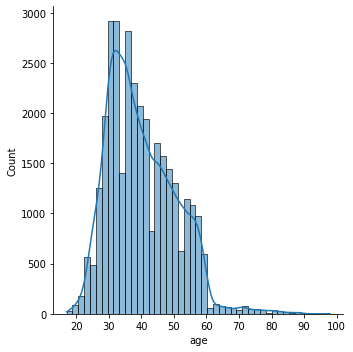

<Figure size 2160x3600 with 0 Axes>

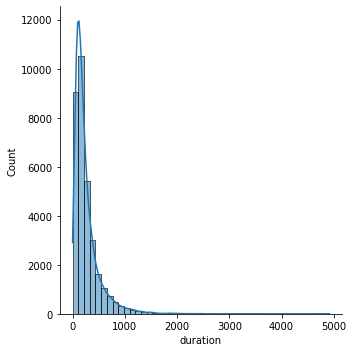

<Figure size 2160x3600 with 0 Axes>

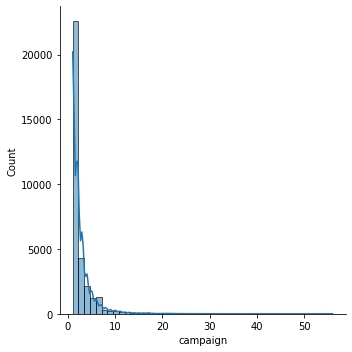

<Figure size 2160x3600 with 0 Axes>

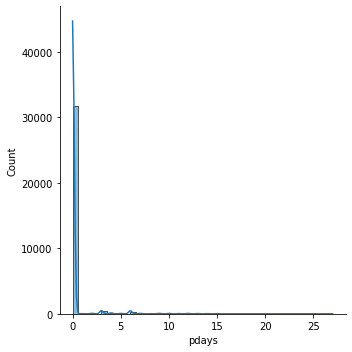

<Figure size 2160x3600 with 0 Axes>

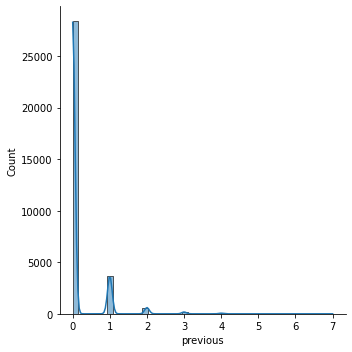

<Figure size 2160x3600 with 0 Axes>

In [47]:
plt.figure(figsize = (30,20))
for column in df_numeric_columns:
  #Create the distplot
  ax=sns.displot(x = df_numeric_columns[column], kind = 'hist', bins=45, kde=True )
  plt.figure(figsize=(30,50))
  plt.show()

From the histogram of frequencies we can see that our previous story with interpretation of descriptive statistics is corroborated these graphs. 

- Distribution of 'age', like we have said, is the most similar to normal distribution. But deviations are present - that is we have tail of distribution which may consist of potential outliers (clients that have 60 years and more). Also we can see slight variations through distribution that annul and 'iron' distribution to look like normal one.
- Duration is positively assimetric and has tail of potential outliers between 1000 and 5000 seconds of phone call duration.
- The same can be said for distribution of variable 'campaign', the majority of data are concentrated between 0 and 10 times the client was contacted during campaign.

<Figure size 5040x4320 with 0 Axes>

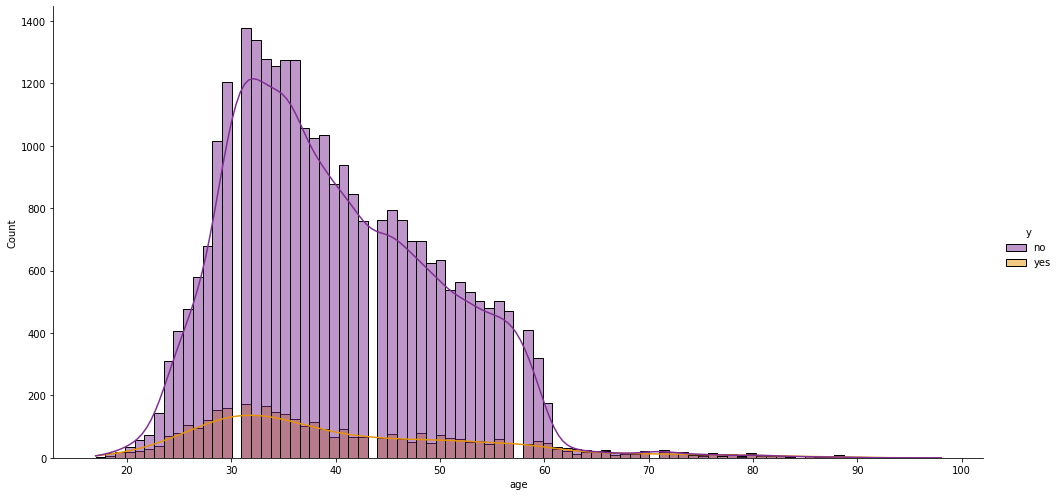

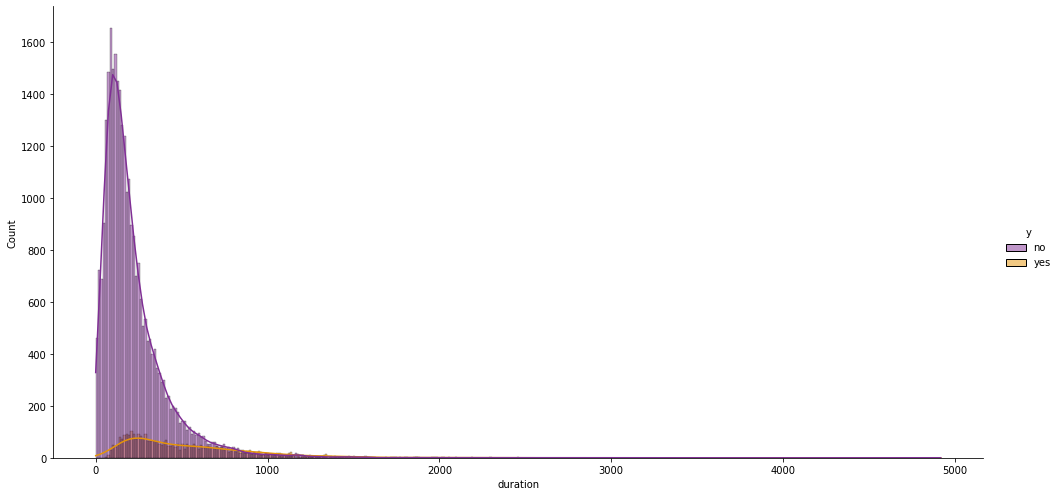

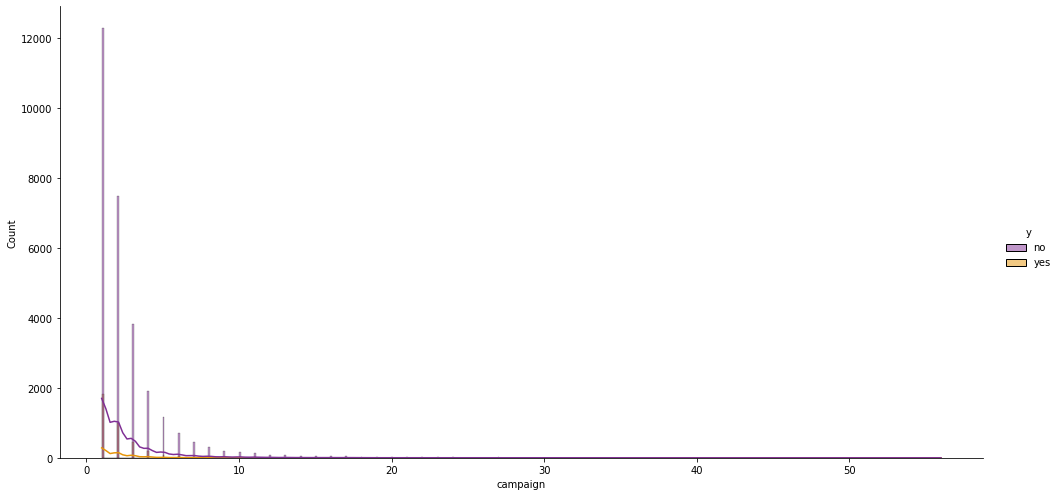

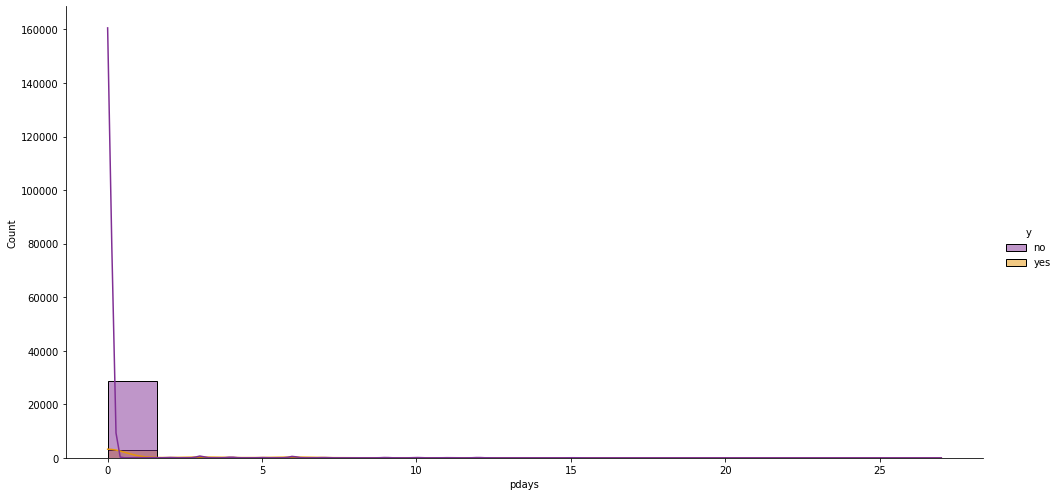

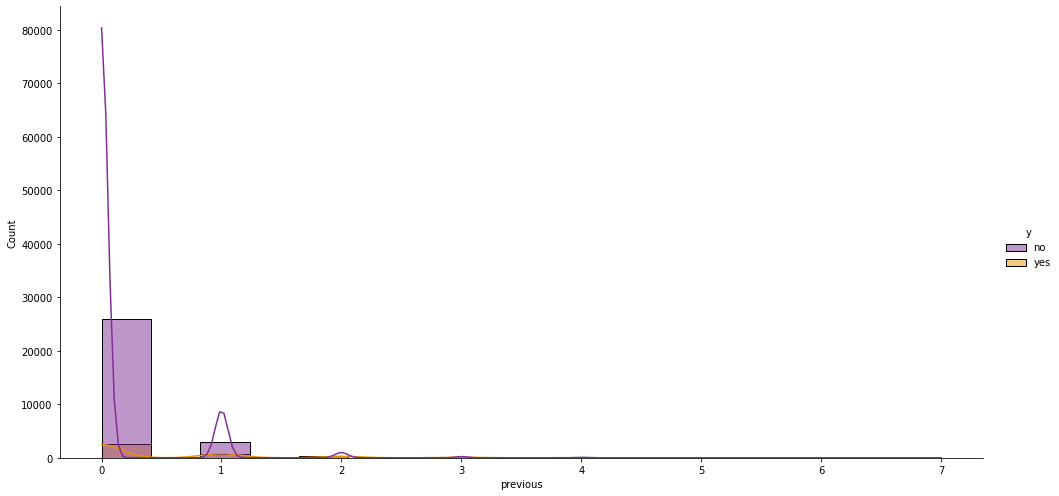

In [48]:
plt.figure(figsize = (70,60), edgecolor= 'b')

for column in df_numeric_columns:
  sns.displot(data=df, x = df_numeric_columns[column], height = 7, aspect = 2 , kde=True, kind='hist', hue = 'y',  palette = 'CMRmap')


We are going to check how our variable 'age' is distributed by different categories, that is by marital status, job and education.
But before that we have to do some grouping.

Let's assume that we can put clients that work in administration, management and services in a group that has high-paid job. Those that work as bluecollar, technician and housemaid in a group that has low-paid job because there are job that require elementary or highschool. Clients that work as entrepreneurs or are self-employed we can call clients with high risk job, because they take financial and other risks of business on themselves but also all profit. And the last group can be those that are student, retired, unknown or unemployed because these clients do not have job, or their monthly income is way lower than income of the previous groups.

One more grouping that we are going to do is for variable 'education'. We can say that those that have finished basic 4, 6 and 9 years of elementary education are the group of clients with primary education. Those who have finished highscool are clients with secondary education. Clients that have finished univeristy or some professional course are those with tertiary education. And the last group are clients that are illiterate or whos education is unknown and they are in group with no education.

After this transformation we can see which age group is the most favorable by different status as a target for term deposit.

In [21]:
df['education'] = df['education'].replace(to_replace = ['basic.9y', 'basic.6y', 'basic.4y'], value = ['elementary_school','elementary_school','elementary_school'])

In [22]:
df_modi = df

In [23]:
df_modi['job'] = df_modi['job'].replace(to_replace = ['admin.', 'management', 'services'], value = ['high_paid_job', 'high_paid_job', 'high_paid_job'])
df_modi['job'] = df_modi['job'].replace(to_replace = ['blue-collar', 'technician', 'housemaid'], value = ['low_paid_job', 'low_paid_job', 'low_paid_job'])
df_modi['job'] = df_modi['job'].replace(to_replace = ['entrepreneur', 'self-employed'], value = ['high_risk_job', 'high_risk_job'])
df_modi['job'] = df_modi['job'].replace(to_replace = ['student', 'retired', 'unknown', 'unemployed'], value = ['no_salary', 'no_salary', 'no_salary', 'no_salary'])

In [24]:
df_modi['education'] = df_modi['education'].replace(to_replace = ['elementary_school'], value = ['primary_education'])
df_modi['education'] = df_modi['education'].replace(to_replace = ['high.school'], value = ['secondary_education'])
df_modi['education'] = df_modi['education'].replace(to_replace = ['university.degree', 'professional.course'], value = ['tertiary_education', 'tertiary_education'])
df_modi['education'] = df_modi['education'].replace(to_replace = ['illiterate', 'unknown'], value = ['no_education', 'no_education'])

<Figure size 5040x4320 with 0 Axes>

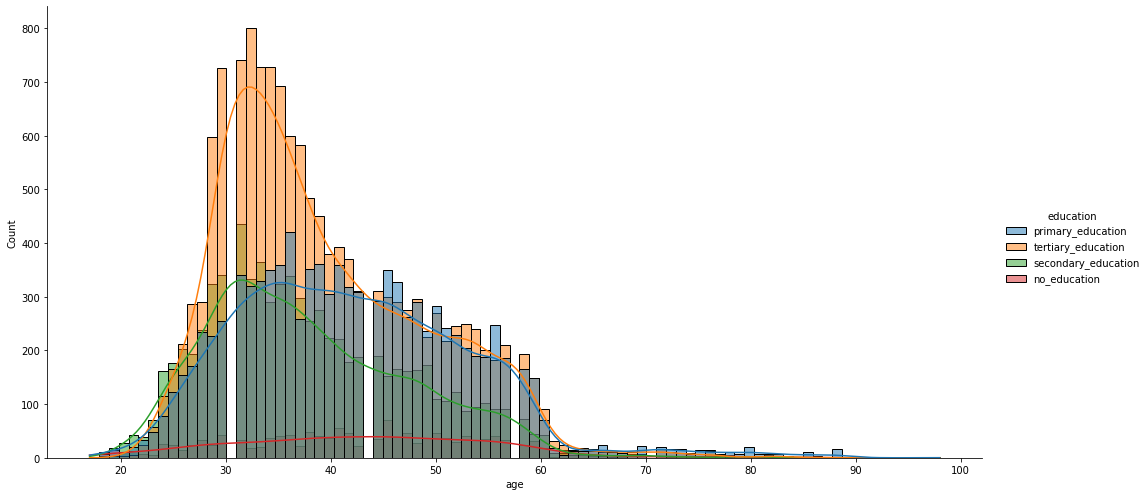

In [25]:
plt.figure(figsize = (70,60), edgecolor= 'b')
sns.displot(data=df_modi, x = df_numeric_columns['age'], height = 7, aspect = 2 , kde=True, kind='hist', hue = 'education')

<Figure size 5040x4320 with 0 Axes>

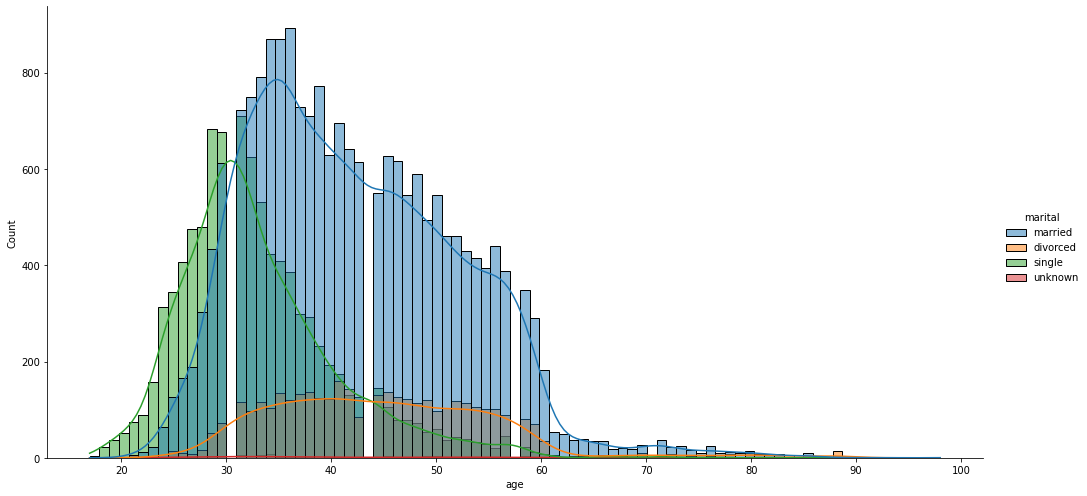

In [26]:
plt.figure(figsize = (70,60), edgecolor= 'b')
sns.displot(data=df, x = df_numeric_columns['age'], height = 7, aspect = 2 , kde=True, kind='hist', hue = 'marital')

<Figure size 5040x4320 with 0 Axes>

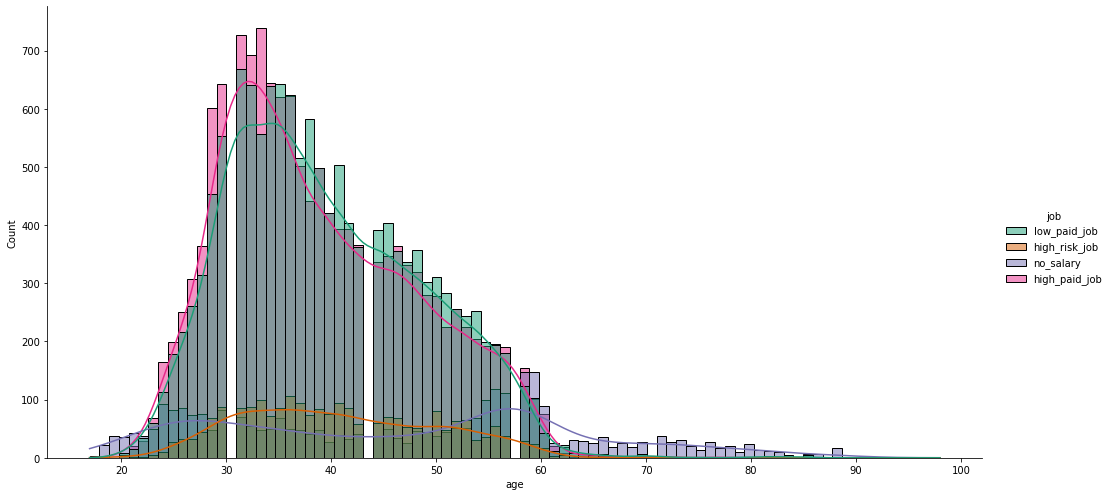

In [27]:
plt.figure(figsize = (70,60), edgecolor= 'b')
sns.displot(data=df_modi, x = df_numeric_columns['age'], height = 7, aspect = 2 , kde=True, kind='hist', hue = 'job',  palette = 'Dark2')

- Group of clients that is 60 years old and more are mainly people who have primary education (which probably means that the have worked some low-paid jobs)and have no salary (that is they are retired).

- Clients from 25 to 35 years are employed in some of high-paid jobs (in administration, management or services), those up to 30 years are mainly single and those from 30 years are mainly married. The majority of them has tertiary education (university degree or some professional course). This could be bank's potential target group.

- Those from 35 to around 55 years are mainly clients that have low-paid jobs (bluecollar, technician, housemaid), thay have either secondary or primary education, and are mainly married but there is also a great number of those who are divorced.

- As for clients from 17 to 25 years, the majority of them is in group that has no salary (they are either students or unemployed) and we have some of them that work some high or low paid jobs (depending on the rank of education), they are single and mainly have either secondary or primary education. They are to be the less popular group of clients because of unstable or no salary, also their salary tends to be very low.


# 2.4. Descriptive statistics and visualisation of categorical variables

In [49]:
df_cat_columns.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32942,32942,32942,32942,32942,32942,32942,32942,32942,32942,32942
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8312,19947,9733,26000,17251,27123,20903,11009,6854,28408,29230


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing

Value Counts of the  job column is:
 admin.           8312
blue-collar      7440
technician       5398
services         3195
management       2345
retired          1364
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64 



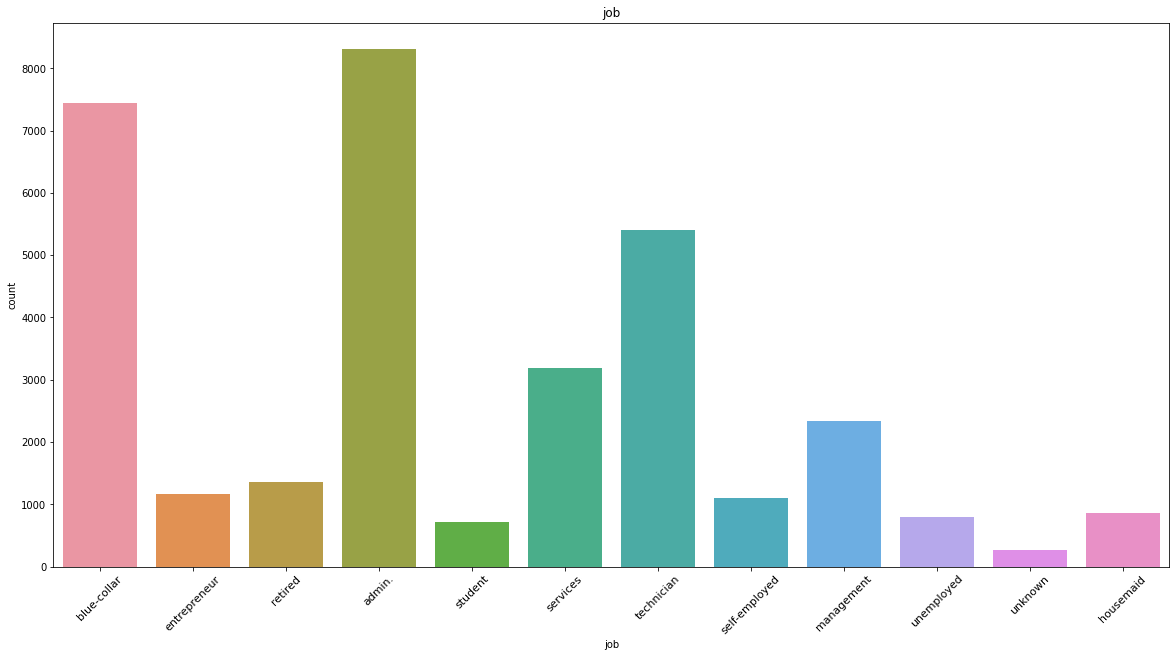

Value Counts of the  marital column is:
 married     19947
single       9256
divorced     3674
unknown        65
Name: marital, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


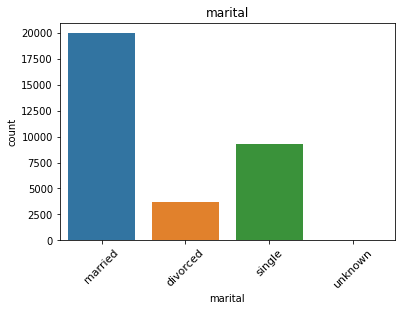

Value Counts of the  education column is:
 university.degree      9733
high.school            7594
basic.9y               4826
professional.course    4191
basic.4y               3322
basic.6y               1864
unknown                1396
illiterate               16
Name: education, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


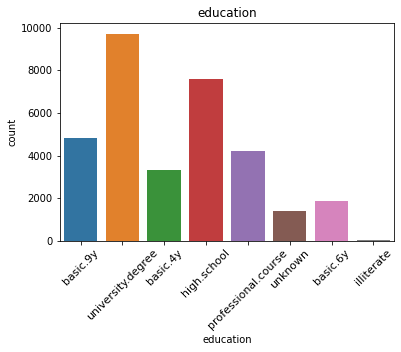

Value Counts of the  default column is:
 no         26000
unknown     6939
yes            3
Name: default, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


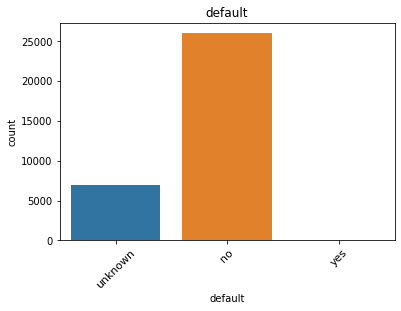

Value Counts of the  housing column is:
 yes        17251
no         14895
unknown      796
Name: housing, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


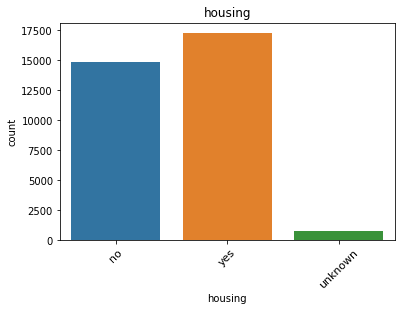

Value Counts of the  loan column is:
 no         27123
yes         5023
unknown      796
Name: loan, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


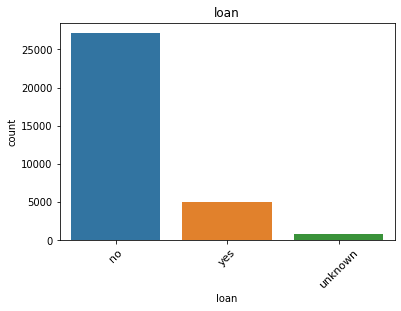

Value Counts of the  contact column is:
 cellular     20903
telephone    12039
Name: contact, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


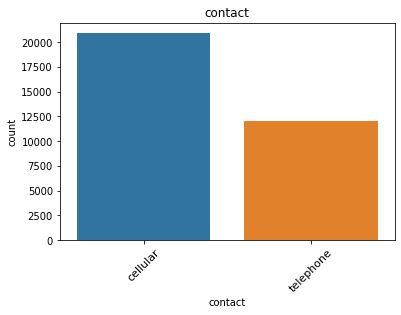

Value Counts of the  month column is:
 may    11009
jul     5761
aug     4946
jun     4247
nov     3265
apr     2085
oct      586
sep      464
mar      436
dec      143
Name: month, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


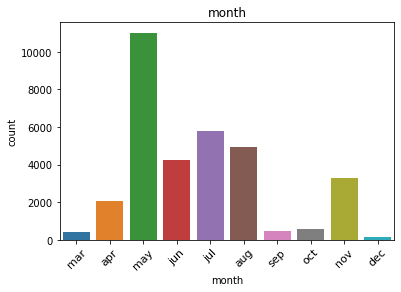

Value Counts of the  day_of_week column is:
 thu    6854
mon    6811
wed    6515
tue    6441
fri    6321
Name: day_of_week, dtype: int64 



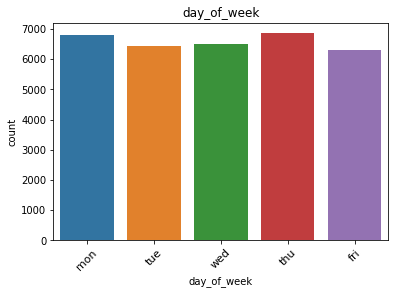

Value Counts of the  poutcome column is:
 nonexistent    28408
failure         3429
success         1105
Name: poutcome, dtype: int64 



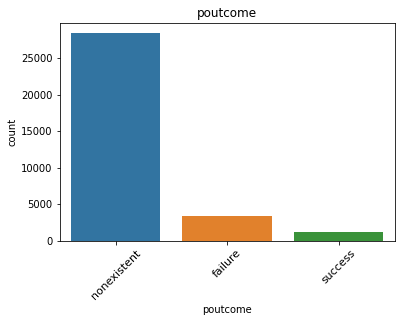

Value Counts of the  y column is:
 no     29230
yes     3712
Name: y, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


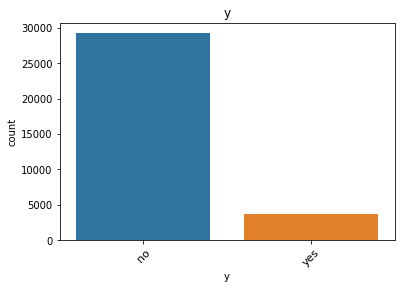

In [50]:

#df_cat_columns['day_of_week'] = pd.Categorical(df_cat_columns['day_of_week'], categories=['mon','tue','wed','thu','fri'], ordered=True)
#df_cat_columns['month'] = pd.Categorical(df_cat_columns['month'], categories = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered = True)
#plt.figure(figsize=(20,10))
#for i in df_cat_columns.columns:
#    print('Value Counts of the ', i, 'column is:\n',df_cat_columns[i].value_counts(),'\n')
#    sns.countplot(df_cat_columns[i])
#    plt.xticks(fontsize=11, rotation = 45)
#    plt.title(i)
#    plt.show()

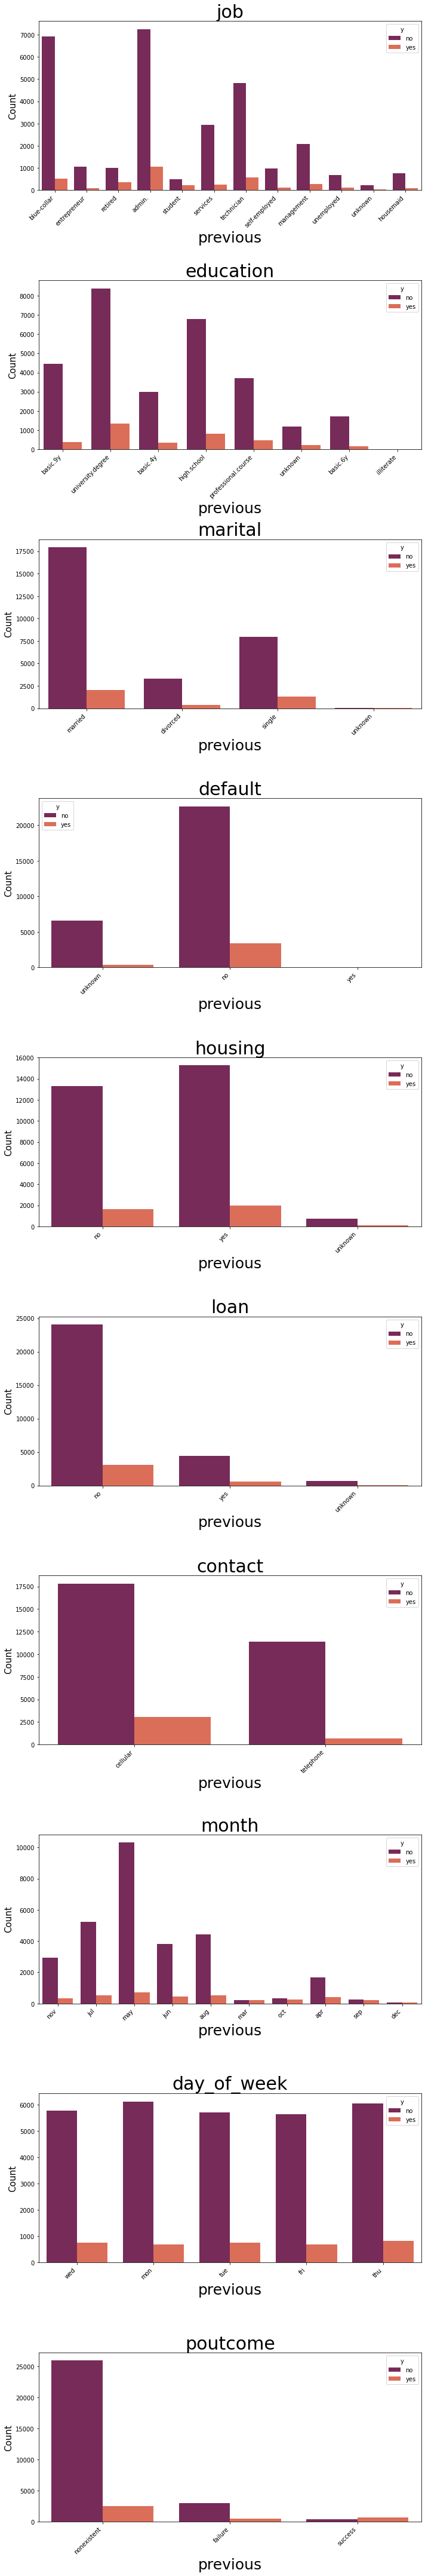

In [51]:
#df = pd.read_csv('new_train.csv')
#fig, ax = plt.subplots(10,1, figsize = (10,60))
#ax = np.ravel(ax)
#categorical_columns = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact',
#                          'month', 'day_of_week', 'poutcome']

#for i in range(len(categorical_columns)):
 # sns.countplot(data=df, x = categorical_columns[i], hue = 'y', ax = ax[i], palette = 'rocket')
 # ax[i].set_xticklabels(labels = df[categorical_columns[i]].unique(), rotation = 45, ha = 'right')
 # ax[i].set_xlabel(column, fontsize = 25)
 # ax[i].set_title(categorical_columns[i], fontsize = 30)
 # ax[i].set_ylabel('Count', fontsize = 15) 
  
#ax = np.reshape(ax, (10,1))
#plt.tight_layout()


From the graphs and frequencies we can see that our categorical variables are highly unbalanced. We do not have proportional number of clients in each variation of each variable except for variable 'day of week', which is the only balanced variable (from both, general and subplot view). 

- What is interesting is that in the case of variable 'previous' we have more clients who have subscribed for term deposit after the previous campaign which was success for them, so they can be labeled as **loyal clients**.

- May and August were the most successful for subscription because when we compare the number of no subscription for term deposit in July and August we can see that we have less no answers in August but also more positive answers than in July. 

- Also we can see that the number of those who have and have not subscribed for term deposit is balanced in autumn and winter months (September, October, December and March) whit exception of November.

- More successful were cellular ways of contacting clients which is understandable because almost everyone has mobile phone.

- As it goes for clients with housing loan we can see that those who have housing loan (mostly people form administration, bluecollar, technicians and managers) are the ones that have subscribed for term deposit instead of those who do not have housing loan.

- And last but not least, clients that are retiered were the ones that have subscribed for term deposit in greater number of cases than those that have job like entrepreneurs, managers, housemaids, service people, self-employed and students (because they have subscribed for the previous campaign too so they can be also labeld as **loyal clients**).

In [52]:
df2 = df_modi

In [53]:
df2['pdays'] = df2['pdays'].replace(999, 0)

In [54]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,low_paid_job,married,primary_education,unknown,no,no,cellular,nov,wed,227,4,0,0,nonexistent,no
1,37,high_risk_job,married,tertiary_education,no,no,no,telephone,nov,wed,202,2,0,1,failure,no
2,78,no_salary,married,primary_education,no,no,no,cellular,jul,mon,1148,1,0,0,nonexistent,yes
3,36,high_paid_job,married,tertiary_education,no,yes,no,telephone,may,mon,120,2,0,0,nonexistent,no
4,59,no_salary,divorced,tertiary_education,no,no,no,cellular,jun,tue,368,2,0,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,high_paid_job,single,secondary_education,no,yes,no,cellular,jul,tue,192,1,0,0,nonexistent,no
32946,52,low_paid_job,married,tertiary_education,no,yes,no,cellular,nov,fri,64,1,0,1,failure,no
32947,54,high_paid_job,married,primary_education,no,no,yes,cellular,jul,mon,131,4,0,0,nonexistent,no
32948,29,high_paid_job,married,tertiary_education,no,no,no,telephone,may,fri,165,1,0,0,nonexistent,no


# **3.Data preparation**

In this section we are going to look for outliers and if there are any see if it is fit to wipe them out or to keep them. 

After that we are going to check the relationship between each categorical independent variable and dependent variable and see if there are some variables that are potential candidates for dropping out of our model.

Then we are going to do encoding of our data with two different encoding techniques: we are going to use OrdinalEncoder for variables 'education', 'month' and 'day_of_week', and LabelEncoder for other categorical variables. We are using oridnal encoder because we want to emphasize the importance of order for these three variables while for other ones order is not important.

And last but not least, we are going to make correlation matrix to be sure of strength between variables both independent and dependent.


# 3.1. Detection of outliers

Outliers detection is mainly done by boxplot, so we are going to make boxplots for our numeric variables.

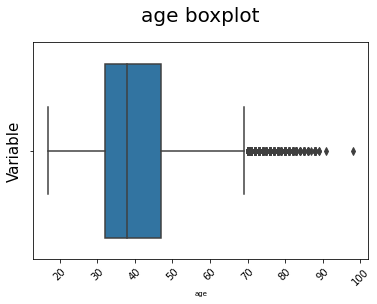

<Figure size 1440x720 with 0 Axes>

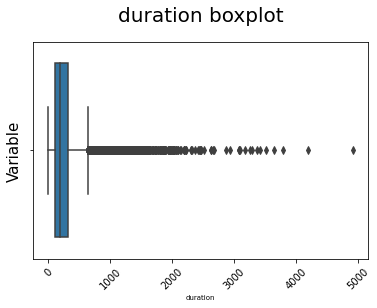

<Figure size 1440x720 with 0 Axes>

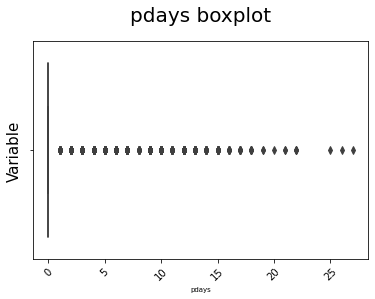

<Figure size 1440x720 with 0 Axes>

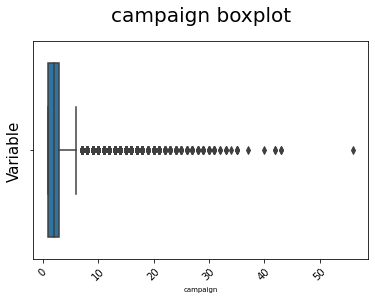

<Figure size 1440x720 with 0 Axes>

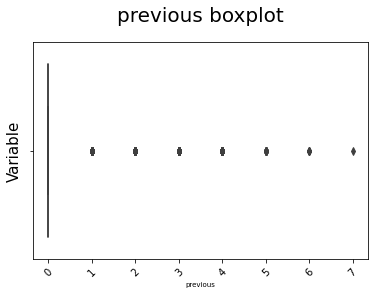

<Figure size 1440x720 with 0 Axes>

In [55]:
numeric_columns = ['age', 'duration', 'pdays', 'campaign', 'previous']
for column in numeric_columns:
  #Create the boxplot
  ax=sns.boxplot(x = df2[column])
  ax.set_xlabel(column, fontsize=7)
  ax.set_ylabel('Variable', fontsize=15)
  ax.set_title(column + ' boxplot', fontsize=20, pad=20)
  plt.xticks(rotation = 45)
  plt.figure(figsize = (20,10))
  plt.show()

Since we can see that there are many outliers we are going to make function that is going to distinct potential (they are not dangerous for modeling and distribution) and true outliers (which can destroy distribution and model because their values are far above the value of most data).

In [56]:
#Function for outliers detection
#Function for outliers detection
def outliers_detection(df_numeric_columns, column):
    
    df_lower_quartile= df_numeric_columns[column].quantile(0.25)
    df_uper_quartile= df_numeric_columns[column].quantile(0.75)


    #Extract the inter quantile range
    df_iqr= df_uper_quartile - df_lower_quartile

    #Get the upper and lower bounds
    lower_bound_up= df_uper_quartile + 1.5*df_iqr
    upper_bound_up= df_uper_quartile + 3*df_iqr

    #Get the upper and lower bounds
    upper_bound_down= df_lower_quartile - 1.5*df_iqr
    lower_bound_down= df_lower_quartile - 3*df_iqr

    #Extract values outside the upper bound
    df_outliers_current= df_numeric_columns[(df_numeric_columns[column] > upper_bound_up) | (df_numeric_columns[column] < lower_bound_down)]
    df_numeric_columns = df_numeric_columns[(df_numeric_columns[column] <= upper_bound_up) & (df_numeric_columns[column] >= lower_bound_down)]

    df_outliers_current['variable']=column
    return df_numeric_columns, df_outliers_current

df_cleaned=df2
df_outliers = pd.DataFrame()
num_variables = ['age', 'duration', 'pdays', 'campaign', 'previous']
for column in num_variables:
    df_cleaned, df_outliers_temp = outliers_detection(df_cleaned, column)
    df_outliers = df_outliers.append(df_outliers_temp)
#%%
df_outliers


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,variable
24339,98,no_salary,married,primary_education,unknown,yes,no,cellular,oct,fri,272,2,0,0,nonexistent,yes,age
2,78,no_salary,married,primary_education,no,no,no,cellular,jul,mon,1148,1,0,0,nonexistent,yes,duration
32,46,high_paid_job,single,tertiary_education,no,yes,no,cellular,nov,tue,1166,3,0,1,failure,no,duration
130,50,high_risk_job,married,secondary_education,no,yes,yes,cellular,may,fri,1326,6,0,1,failure,no,duration
153,43,high_risk_job,married,tertiary_education,unknown,yes,yes,telephone,jun,wed,1487,1,0,0,nonexistent,no,duration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32901,30,high_paid_job,single,tertiary_education,no,no,no,cellular,aug,tue,156,1,0,2,failure,no,previous
32905,30,high_paid_job,single,tertiary_education,no,no,no,cellular,nov,thu,197,5,0,1,failure,no,previous
32933,33,low_paid_job,divorced,tertiary_education,no,yes,no,cellular,apr,mon,153,1,0,1,failure,no,previous
32934,29,low_paid_job,single,secondary_education,no,yes,no,cellular,may,mon,134,2,0,1,failure,no,previous


We can see that our function has whipped out 6117 rows of out dataset that have represented outliers by these set numeric variables. This is a huge number of rows in comparison to total number of rows but we are going to see that the distribution is for sure to be more alike to normal distribution than before.

In [57]:
df_cleaned.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [58]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26825 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          26825 non-null  int64 
 1   job          26825 non-null  object
 2   marital      26825 non-null  object
 3   education    26825 non-null  object
 4   default      26825 non-null  object
 5   housing      26825 non-null  object
 6   loan         26825 non-null  object
 7   contact      26825 non-null  object
 8   month        26825 non-null  object
 9   day_of_week  26825 non-null  object
 10  duration     26825 non-null  int64 
 11  campaign     26825 non-null  int64 
 12  pdays        26825 non-null  int64 
 13  previous     26825 non-null  int64 
 14  poutcome     26825 non-null  object
 15  y            26825 non-null  object
dtypes: int64(5), object(11)
memory usage: 3.5+ MB


We are going to do some initial steps to be sure we have done good job. But for sure we now have 26825 rows instead of 32950.

In [59]:
df_2 = df_cleaned

In [60]:
df_2_cat = df_2.select_dtypes(include='object')

In [61]:
df_2_num = df_2.select_dtypes(include='number')

In [62]:
df_2_cat.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,26825,26825,26825,26825,26825,26825,26825,26825,26825,26825,26825
unique,4,4,4,3,3,3,2,10,5,1,2
top,low_paid_job,married,tertiary_education,no,yes,no,cellular,may,mon,nonexistent,no
freq,11459,16474,11275,20729,13941,22091,15829,9016,5620,26825,24767


In [63]:
df_2_num.describe()

,age,duration,campaign,pdays,previous
count,26825.000000,26825.000000,26825.000000,26825.0,26825.0
mean,39.967493,231.338751,2.271314,0.0,0.0
std,10.026102,184.817344,1.652270,0.0,0.0
min,18.000000,0.000000,1.000000,0.0,0.0
25%,32.000000,102.000000,1.000000,0.0,0.0
50%,38.000000,174.000000,2.000000,0.0,0.0
75%,47.000000,304.000000,3.000000,0.0,0.0
max,89.000000,967.000000,9.000000,0.0,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an expl

Value Counts of the  job column is:
 low_paid_job     11459
high_paid_job    11206
no_salary         2302
high_risk_job     1858
Name: job, dtype: int64 



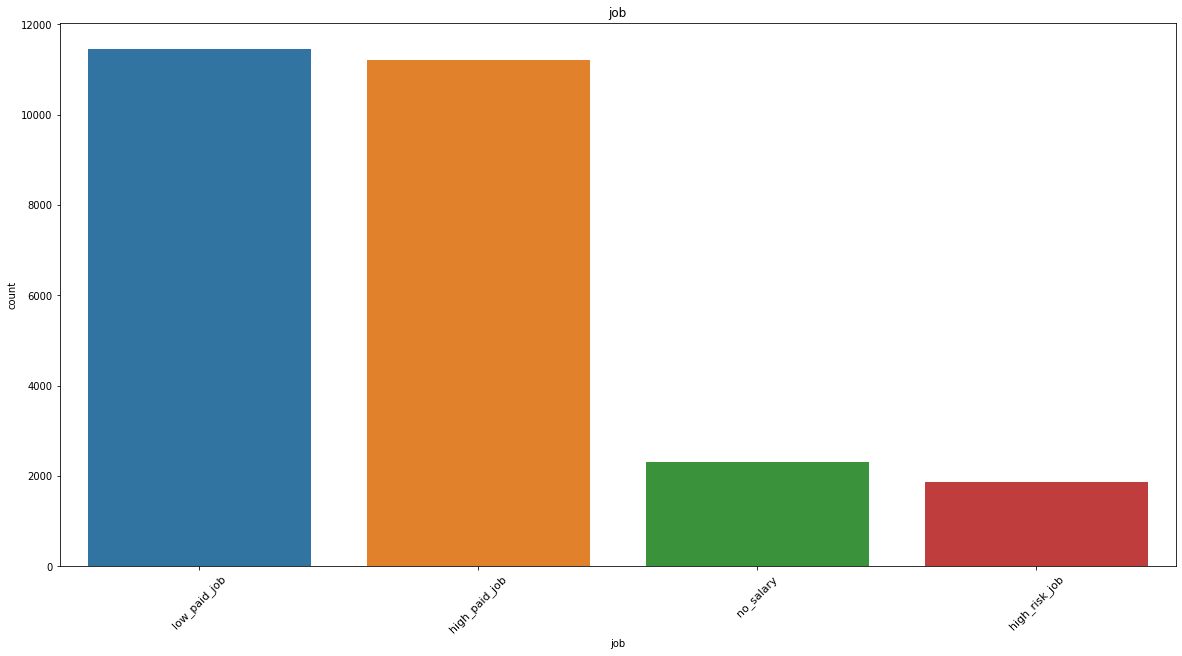

Value Counts of the  marital column is:
 married     16474
single       7293
divorced     3016
unknown        42
Name: marital, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


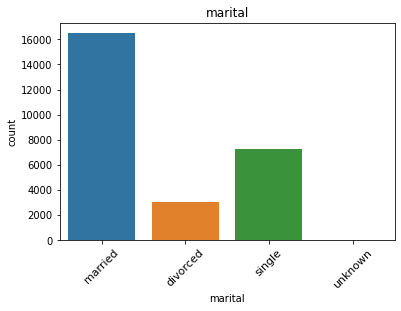

Value Counts of the  education column is:
 tertiary_education     11275
primary_education       8352
secondary_education     6083
no_education            1115
Name: education, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


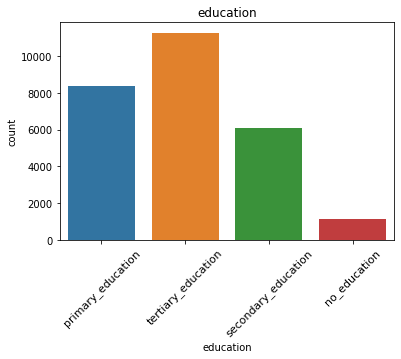

Value Counts of the  default column is:
 no         20729
unknown     6094
yes            2
Name: default, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


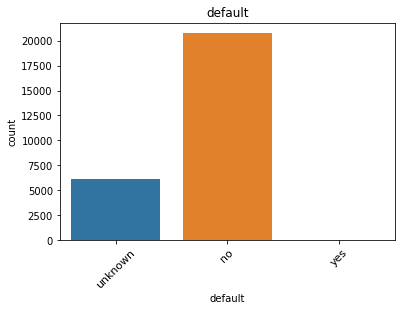

Value Counts of the  housing column is:
 yes        13941
no         12230
unknown      654
Name: housing, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


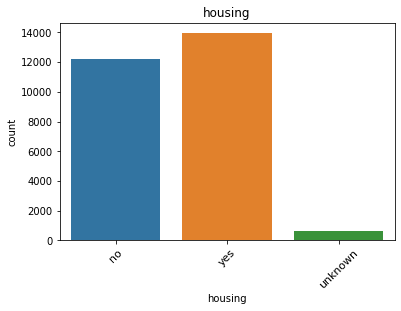

Value Counts of the  loan column is:
 no         22091
yes         4080
unknown      654
Name: loan, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


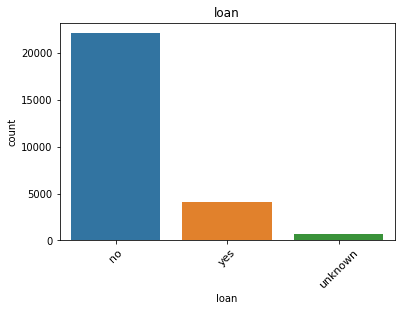

Value Counts of the  contact column is:
 cellular     15829
telephone    10996
Name: contact, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


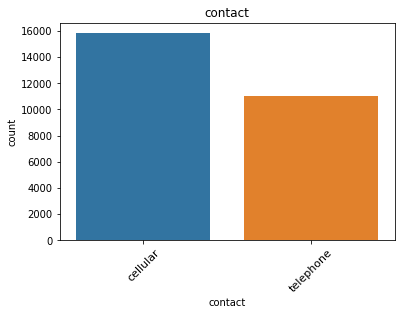

Value Counts of the  month column is:
 may    9016
jul    5116
aug    4308
jun    3679
nov    2392
apr    1420
oct     322
mar     281
sep     220
dec      71
Name: month, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


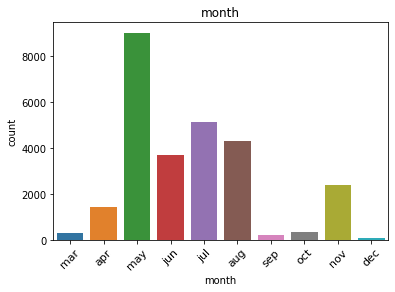

Value Counts of the  day_of_week column is:
 mon    5620
thu    5518
wed    5342
tue    5261
fri    5084
Name: day_of_week, dtype: int64 



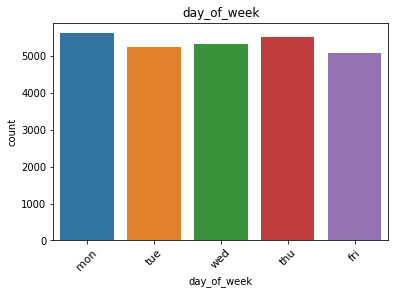

Value Counts of the  poutcome column is:
 nonexistent    26825
Name: poutcome, dtype: int64 



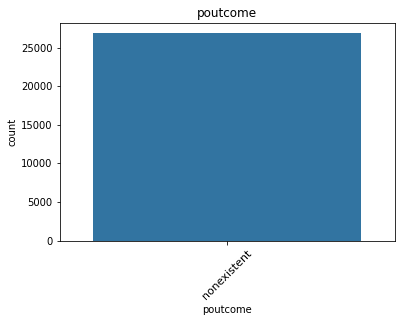

Value Counts of the  y column is:
 no     24767
yes     2058
Name: y, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


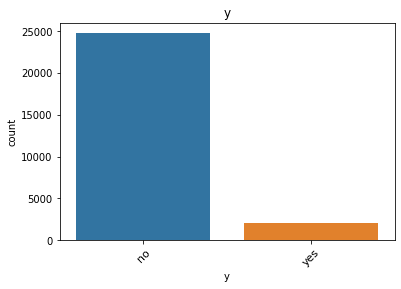

In [64]:
df_2_cat['day_of_week'] = pd.Categorical(df_2_cat['day_of_week'], categories=['mon','tue','wed','thu','fri'], ordered=True)
df_2_cat['month'] = pd.Categorical(df_2_cat['month'], categories = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered = True)
plt.figure(figsize=(20,10))
for i in df_2_cat.columns:
    print('Value Counts of the ', i, 'column is:\n',df_2_cat[i].value_counts(),'\n')
    sns.countplot(df_2_cat[i])
    plt.xticks(fontsize=11, rotation = 45)
    plt.title(i)
    plt.show()

After cleaning out outliers we can see that the only value for variable 'poutcome' is value = nonexistent, and because of that we can drop that variable from our dataset because we now only have clients whose previous campaign outcome we do not know.

In [65]:
df_2 = df_2.drop(columns = 'poutcome', axis =1)

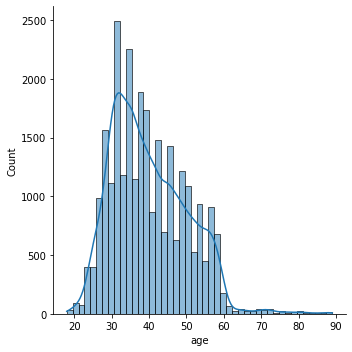

<Figure size 2160x3600 with 0 Axes>

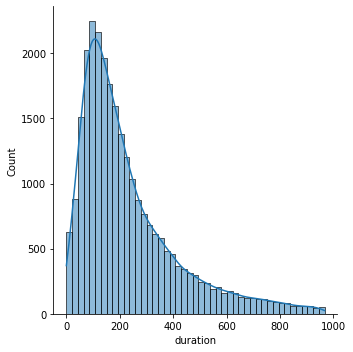

<Figure size 2160x3600 with 0 Axes>

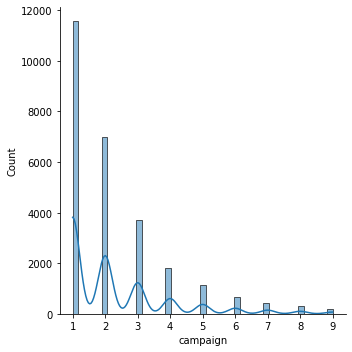

<Figure size 2160x3600 with 0 Axes>

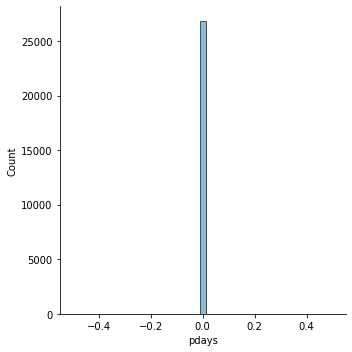

<Figure size 2160x3600 with 0 Axes>

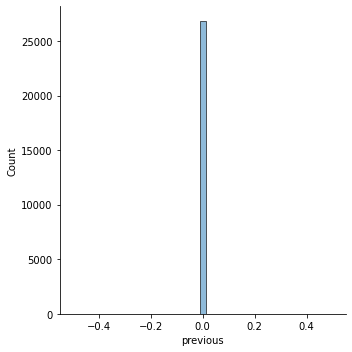

<Figure size 2160x3600 with 0 Axes>

In [66]:
for column in df_2_num:
  #Create the distplot
  ax=sns.displot(x = df_2[column], kind = 'hist', bins=45, kde=True )
  plt.figure(figsize=(30,50))
  plt.show()

We can see that we have cleaned all variations of variable 'previous' except the 0 one, so we can drop this variable because now all clients in our data now are those that were not contacted. The same goes for variable 'pdays'.

Also we can see that the distribution of our numeric variables in now 'ironed', that is it is less assimetric and closer to normal distribution.

In [67]:
df_2 = df_2.drop(columns = ['pdays','previous'], axis = 1)

In [68]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26825 entries, 0 to 32949
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          26825 non-null  int64 
 1   job          26825 non-null  object
 2   marital      26825 non-null  object
 3   education    26825 non-null  object
 4   default      26825 non-null  object
 5   housing      26825 non-null  object
 6   loan         26825 non-null  object
 7   contact      26825 non-null  object
 8   month        26825 non-null  object
 9   day_of_week  26825 non-null  object
 10  duration     26825 non-null  int64 
 11  campaign     26825 non-null  int64 
 12  y            26825 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.9+ MB


In [69]:
df2_num = df_2.select_dtypes(include = 'number')

<Figure size 5040x4320 with 0 Axes>

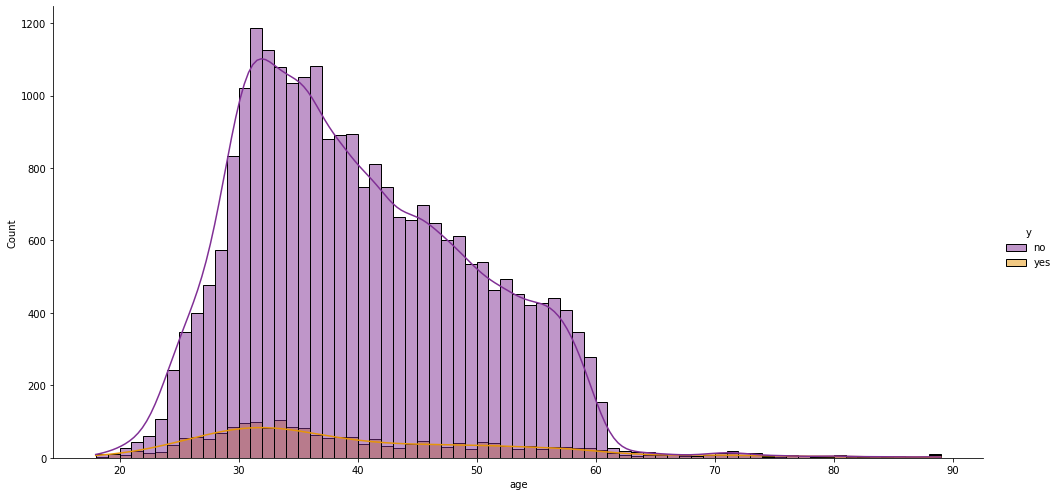

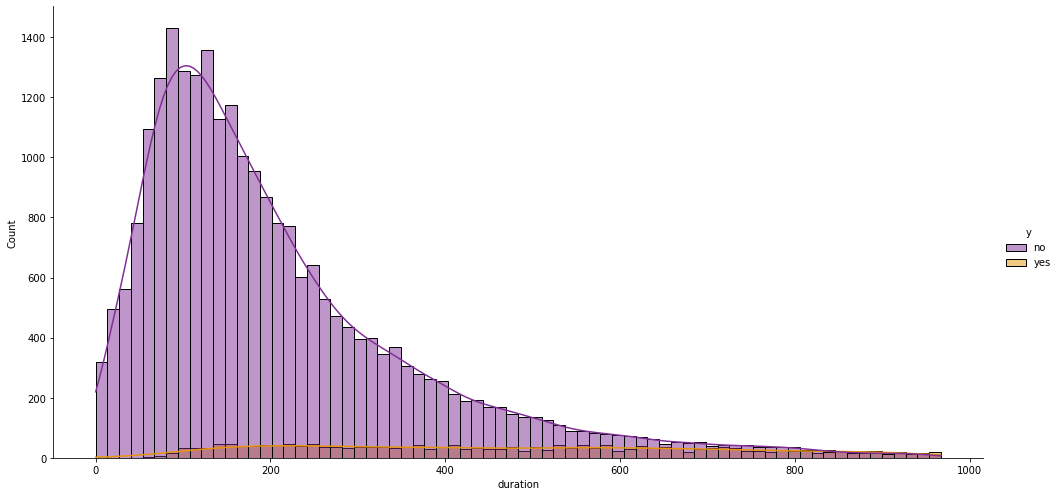

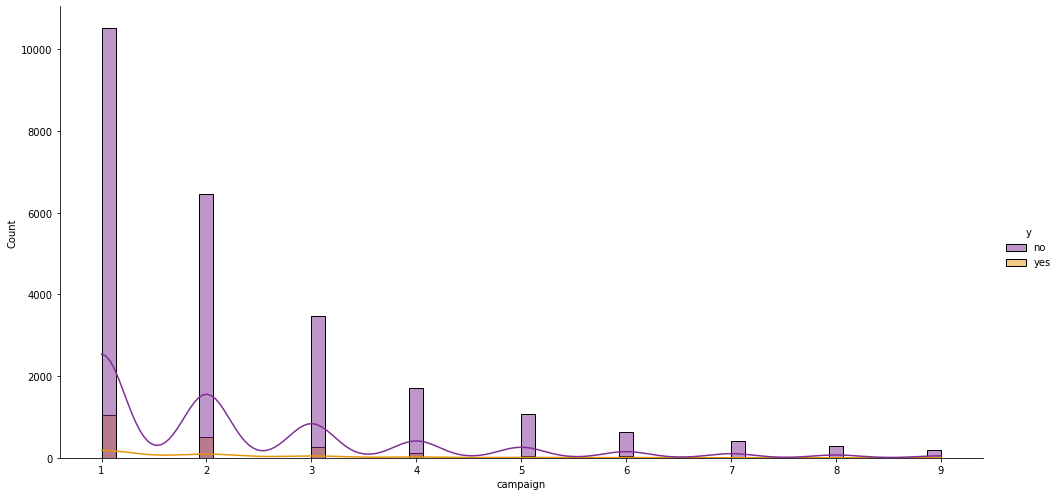

In [70]:
plt.figure(figsize = (70,60), edgecolor= 'b')

for column in df2_num:
  sns.displot(data=df_2, x = df2_num[column], height = 7, aspect = 2 , kde=True, kind='hist', hue = 'y',  palette = 'CMRmap')


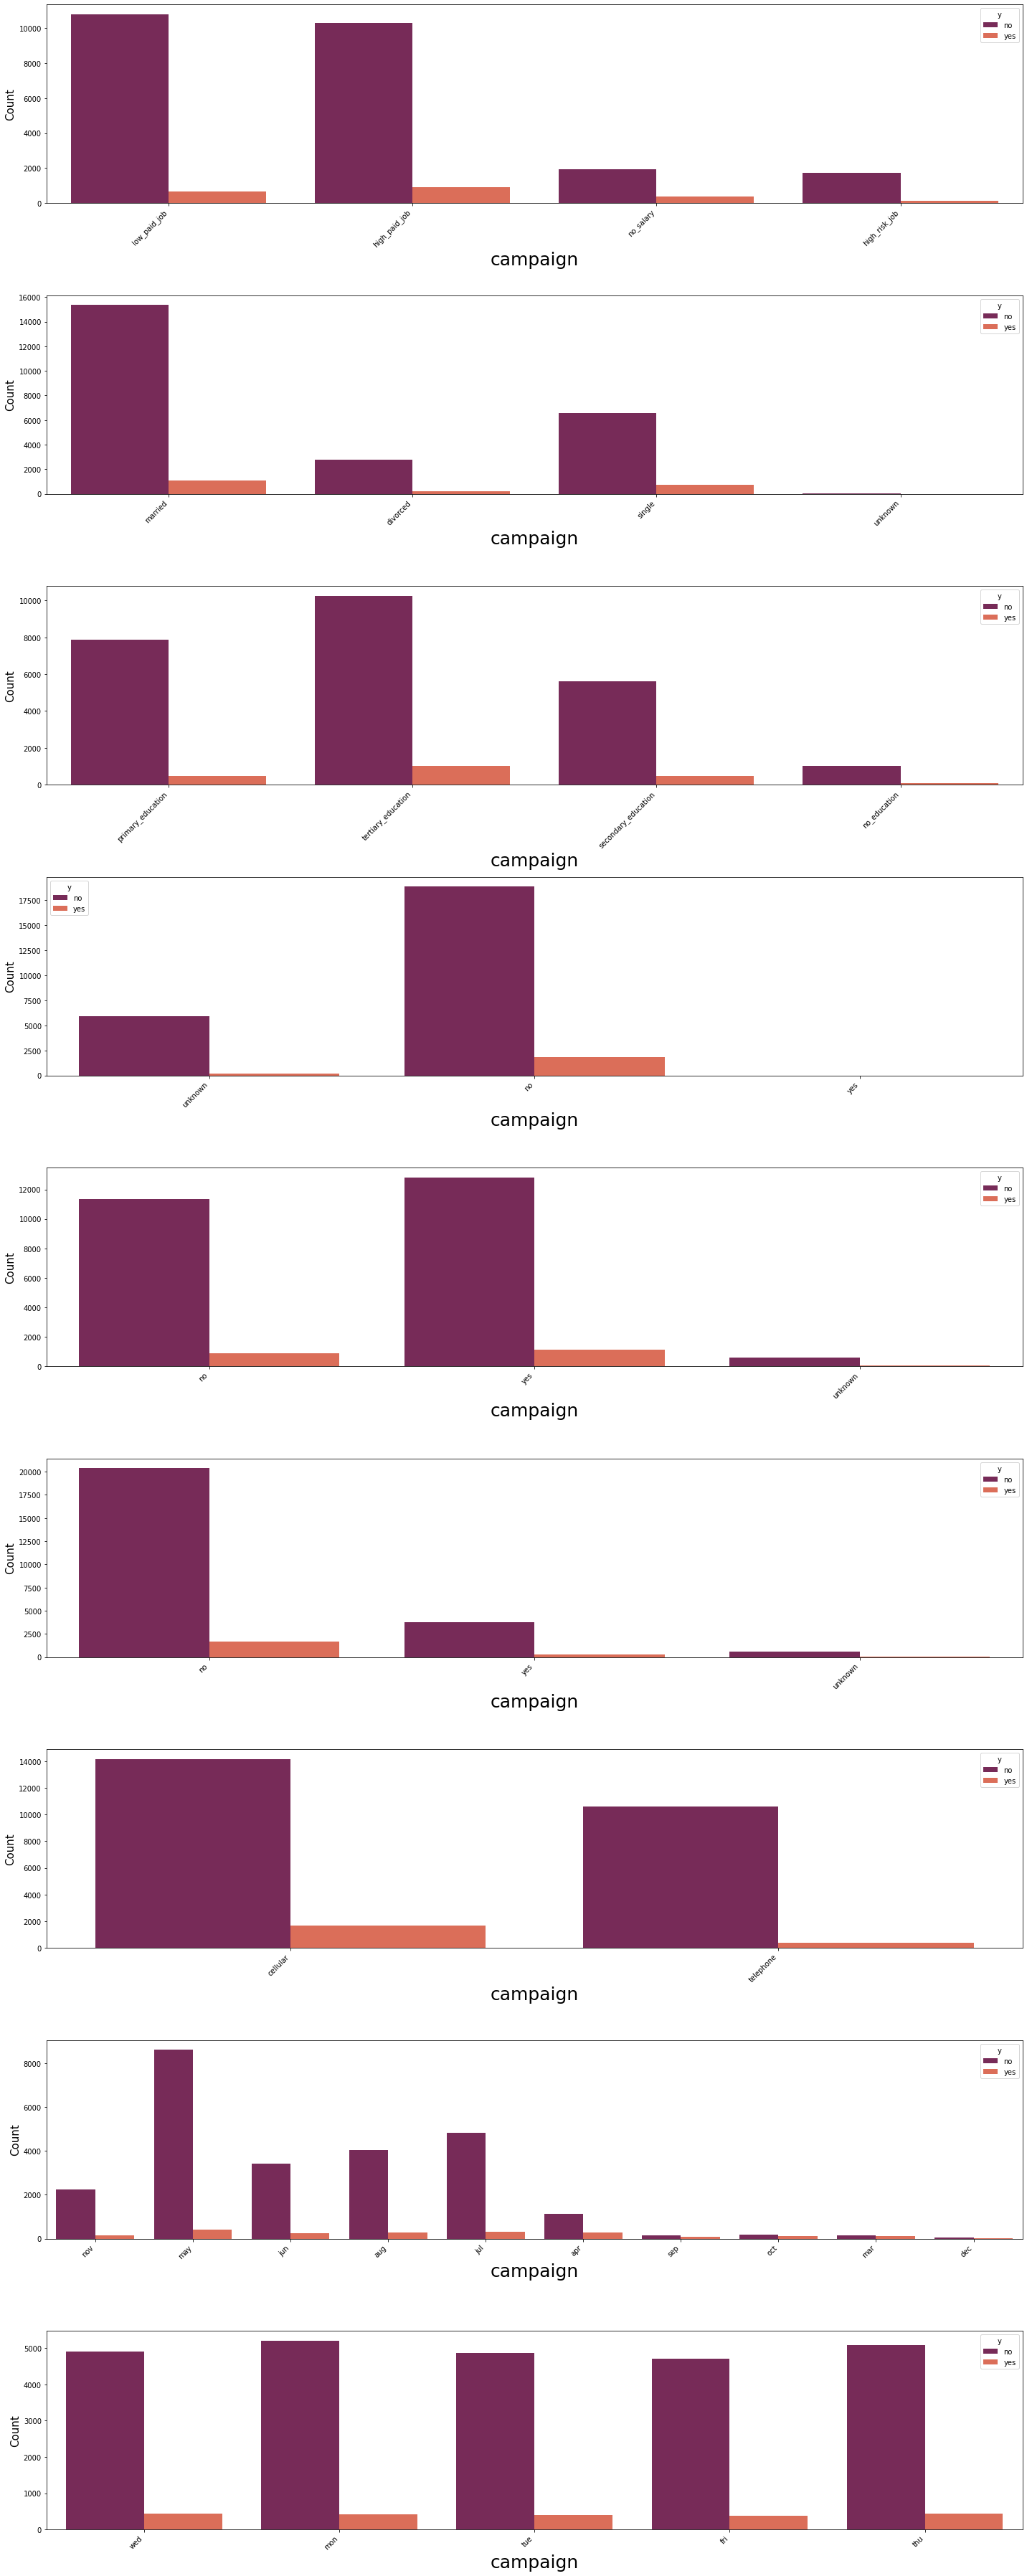

In [71]:
categori_variable = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
fig, ax = plt.subplots(9,1, figsize = (20,50))
ax = np.ravel(ax)
for i in range(len(categori_variable)):
  sns.countplot(data=df_2, x = categori_variable[i], hue = 'y', ax = ax[i], palette = 'rocket')
  ax[i].set_xticklabels(labels = df_2[categori_variable[i]].unique(), rotation = 45, ha = 'right')
  ax[i].set_xlabel(column, fontsize = 25)
  ax[i].set_ylabel('Count', fontsize = 15) 
  
  
    

ax = np.reshape(ax, (9,1))
plt.tight_layout()

We are going to check for outliers again.

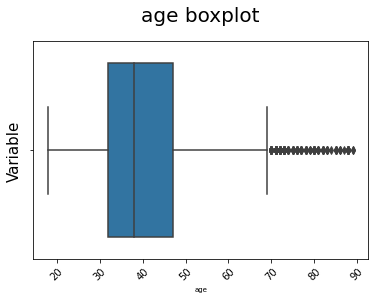

<Figure size 1440x720 with 0 Axes>

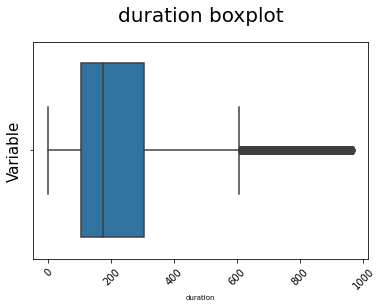

<Figure size 1440x720 with 0 Axes>

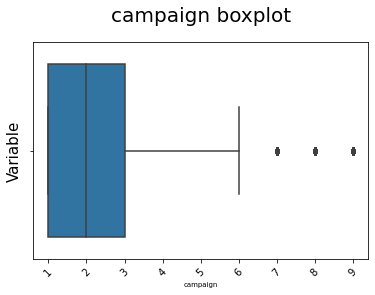

<Figure size 1440x720 with 0 Axes>

In [72]:
numeric_variable = ['age', 'duration', 'campaign']
for column in numeric_variable:
  #Create the boxplot
  ax=sns.boxplot(x = df_2[column])
  ax.set_xlabel(column, fontsize=7)
  ax.set_ylabel('Variable', fontsize=15)
  ax.set_title(column + ' boxplot', fontsize=20, pad=20)
  plt.xticks(rotation = 45)
  plt.figure(figsize = (20,10))
  plt.show()

Outliers are yet again present but that is okay because we are not going to drop any more of them because iterative searching and dropping of outliers is not always welcome because in this way we can jeopardize the representativeness of our sample (in some cases we can reduce the sample size by more than 50%).

# 3.2. Testing the hypothesis of (in) dependence of attributive features

We can shorten our time in searching for existence of relationship between independent categorical variables and dependent variable by using the chi-square test for testing the hypothesis of (in) dependence of attributive features. 
The idea behind the whole test is to make the crosstab matrix with variations of one variable shown in rows and variation of another variable shown in columns. Inbetween are the frequencies of each crossed values of variables.

There are some assumptions that need to be met:
1. It can be applied only on absolute frequencies.
2. The sum of the empirical frequencies must be equal to the sum of the theoretical frequencies.
3. There are no theoretical frequencies less than 5.

Now we are going to set our null and alternative hypothesis and check the results of our analysis.


1. *Null hypothesis*: There's no relationship between the person currently using a housing loan and the person's subscription.

  *Alternative hypothesis:* There's a relationship between the person currently using a housing loan and the person's subscription.


2. *Null hypothesis:* There's no relationship between the person's job and the person's subscription.

   *Alternative hypothesis*: There's a relationship between the person's job and the person's subscription.


3. *Null hypothesis*: There's no relationship between the person's education and the person's subscription.

   *Alternative hypothesis*: There's a relationship between the person's education and the person's subscription.


4. *Null hypothesis*: There's no relationship between the person's marital status and the person's subscription.

   *Alternative hypothesis*: There's a relationship between the person's marital status and the person's subscription.


5. *Null hypothesis*: There's no relationship between the person's current default status and the person's subscription.

   *Alternative hypothesis*: There's a relationship between the person's current default status and the person's subscription.


6. *Null hypothesis*: There's no relationship between the way the person was contacted and the person's subscription.

   *Alternative hypothesis*: There's a relationship between the way the person was contacted and the person's subscription.


7. *Null hypothesis*: There's no relationship between the month in which the person was contacted and the person's subscription.

   *Alternative hypothesis*: There's a relationship between the month in which the person was contacted and the person's subscription.


8. *Null hypothesis*: There's no relationship between the day of week in which the person was contacted and the person's subscription.

   *Alternative hypothesis*: There's a relationship between the day of week in which the person was contacted and the person's subscription.


9. *Null hypothesis*: There's no relationship between the outcome of the previous campaign and the person's subscription for the current campaign.

   *Alternative hypothesis*: There's a relationship between the outcome of the previous campaign  and the person's subscription for the current campaign.


10. *Null hypothesis*: There's no relationship between the person currently using a personal loan and the person's subscription.

   Alternative hypothesis: There's a relationship between the person currently using a personal loan and the person's subscription.

We are going to use the significance level (alpha) equal to 0.05.

In [73]:

contingency = pd.crosstab(df["y"], df["housing"])
chi_2, p_val, dof, expected_freq = chi2_contingency(contingency)
print(f"Chi-square score between housing loan and subscription is {chi_2}, p-value is {p_val.round(7)}")

contingency = pd.crosstab(df["y"], df["job"])
chi_2, p_val, dof, expected_freq = chi2_contingency(contingency)
print(f"Chi-square score between job and subscription is {chi_2}, p-value is {p_val.round(7)}")

contingency = pd.crosstab(df["y"], df["education"])
chi_2, p_val, dof, expected_freq = chi2_contingency(contingency)
print(f"Chi-square score between education and subscription is {chi_2}, p-value is {p_val.round(7)}")

contingency = pd.crosstab(df["y"], df["marital"])
chi_2, p_val, dof, expected_freq = chi2_contingency(contingency)
print(f"Chi-square score between marital and subscription is {chi_2}, p-value is {p_val.round(7)}")

contingency = pd.crosstab(df["y"], df["default"])
chi_2, p_val, dof, expected_freq = chi2_contingency(contingency)
print(f"Chi-square score between default and subscription is {chi_2}, p-value is {p_val.round(7)}")

contingency = pd.crosstab(df["y"], df["contact"])
chi_2, p_val, dof, expected_freq = chi2_contingency(contingency)
print(f"Chi-square score between contact and subscription is {chi_2}, p-value is {p_val.round(7)}")

contingency = pd.crosstab(df["y"], df["month"])
chi_2, p_val, dof, expected_freq = chi2_contingency(contingency)
print(f"Chi-square score between month and subscription is {chi_2}, p-value is {p_val.round(7)}")

contingency = pd.crosstab(df["y"], df["day_of_week"])
chi_2, p_val, dof, expected_freq = chi2_contingency(contingency)
print(f"Chi-square score between day_of_week and subscription is {chi_2}, p-value is {p_val.round(7)}")


contingency = pd.crosstab(df["y"], df["loan"])
chi_2, p_val, dof, expected_freq = chi2_contingency(contingency)
print(f"Chi-square score between loan and subscription is {chi_2}, p-value is {p_val.round(7)}")



Chi-square score between housing loan and subscription is 3.18159141843302, p-value is 0.2037634
Chi-square score between job and subscription is 756.3303578965547, p-value is 0.0
Chi-square score between education and subscription is 165.70316494240058, p-value is 0.0
Chi-square score between marital and subscription is 110.26062017522888, p-value is 0.0
Chi-square score between default and subscription is 323.8855416395806, p-value is 0.0
Chi-square score between contact and subscription is 675.0981903473323, p-value is 0.0
Chi-square score between month and subscription is 2458.7825158989253, p-value is 0.0
Chi-square score between day_of_week and subscription is 12.890706979436331, p-value is 0.0118224
Chi-square score between loan and subscription is 0.009169655868587832, p-value is 0.9954257


From our results we can conclude the following:
- Since p-value is greater than aplha we conclude that we do not have enough evidence to reject the null hypothesis that says that there in no statistically significant relationship between variables housing loan and presonal loan and variable y (subscription for term deposit), respectively.
- Since p-value is greater than aplha we conclude that we have to reject null hypotesis and accept alternative hypothesis that says that there is statistically significant relationship between variables jog, education, marital, default, contact, month, day_of_week and poutcome and variable y (subscription for term deposit), respectively. 

The results suggest that we can freely drop variables housing and loan since they do not impact the person's decision for subscribing for the deposit. With this our initially set *Hipotesis 6: Clients with some kind of loan are less likely to subscribe a for term deposit.* can be dropped, due to no impact of these variables on subscription for term deposit.

# 3.3. Encoding of categorical variables

In [74]:
le = LabelEncoder() 
oe = OrdinalEncoder()

In [75]:
df2_category = df_2.select_dtypes(include = 'object')

In [76]:
df2_numeric = df_2.select_dtypes(include = 'number')

In [77]:
df2_categoryLE = df2_category.drop(columns = ['month', 'day_of_week', 'education'], axis = 1).apply(LabelEncoder().fit_transform)
df2_categoryLE

,job,marital,default,housing,loan,contact,y
0,2,1,1,0,0,0,0
3,0,1,0,2,0,1,0
4,3,0,0,0,0,0,0
5,0,2,0,0,0,0,0
6,3,2,0,0,0,1,1
...,...,...,...,...,...,...,...
32944,2,1,0,0,0,0,0
32945,0,2,0,2,0,0,0
32947,0,1,0,0,2,0,0
32948,0,1,0,0,0,1,0


In [78]:
df2_category_ordinal = df2_category.drop(columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'y'], axis = 1)

In [79]:
Education = ['primary_education', 'secondary_education', 'tertiary_education', 'no_education']
Month = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
Day = ['mon', 'tue', 'wed', 'thu', 'fri']

In [80]:
oe = OrdinalEncoder(categories = [Education])
oe1 = OrdinalEncoder(categories = [Month])
oe2 = OrdinalEncoder(categories = [Day])

In [81]:
df2_category_ordinal[['education']] = oe.fit_transform(df2_category_ordinal[['education']])
df2_category_ordinal[['month']] = oe1.fit_transform(df2_category_ordinal[['month']])
df2_category_ordinal[['day_of_week']] = oe2.fit_transform(df2_category_ordinal[['day_of_week']])

In [82]:
df2_category_ordinal

,education,month,day_of_week
0,0.0,8.0,2.0
3,2.0,2.0,0.0
4,2.0,3.0,1.0
5,2.0,5.0,2.0
6,0.0,5.0,2.0
...,...,...,...
32944,0.0,2.0,3.0
32945,1.0,4.0,1.0
32947,0.0,4.0,0.0
32948,2.0,2.0,4.0


In [83]:
df2_category = pd.concat([df2_categoryLE, df2_category_ordinal], axis = 1)

In [84]:
df2_coded = pd.concat([df2_category, df2_numeric], axis = 1)

In [85]:
df2_coded

,job,marital,default,housing,loan,contact,y,education,month,day_of_week,age,duration,campaign
0,2,1,1,0,0,0,0,0.0,8.0,2.0,49,227,4
3,0,1,0,2,0,1,0,2.0,2.0,0.0,36,120,2
4,3,0,0,0,0,0,0,2.0,3.0,1.0,59,368,2
5,0,2,0,0,0,0,0,2.0,5.0,2.0,29,256,2
6,3,2,0,0,0,1,1,0.0,5.0,2.0,26,449,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32944,2,1,0,0,0,0,0,0.0,2.0,3.0,29,16,7
32945,0,2,0,2,0,0,0,1.0,4.0,1.0,28,192,1
32947,0,1,0,0,2,0,0,0.0,4.0,0.0,54,131,4
32948,0,1,0,0,0,1,0,2.0,2.0,4.0,29,165,1


# 3.4. Correlation matrix and selection of variables for modeling

<Figure size 3600x3600 with 0 Axes>

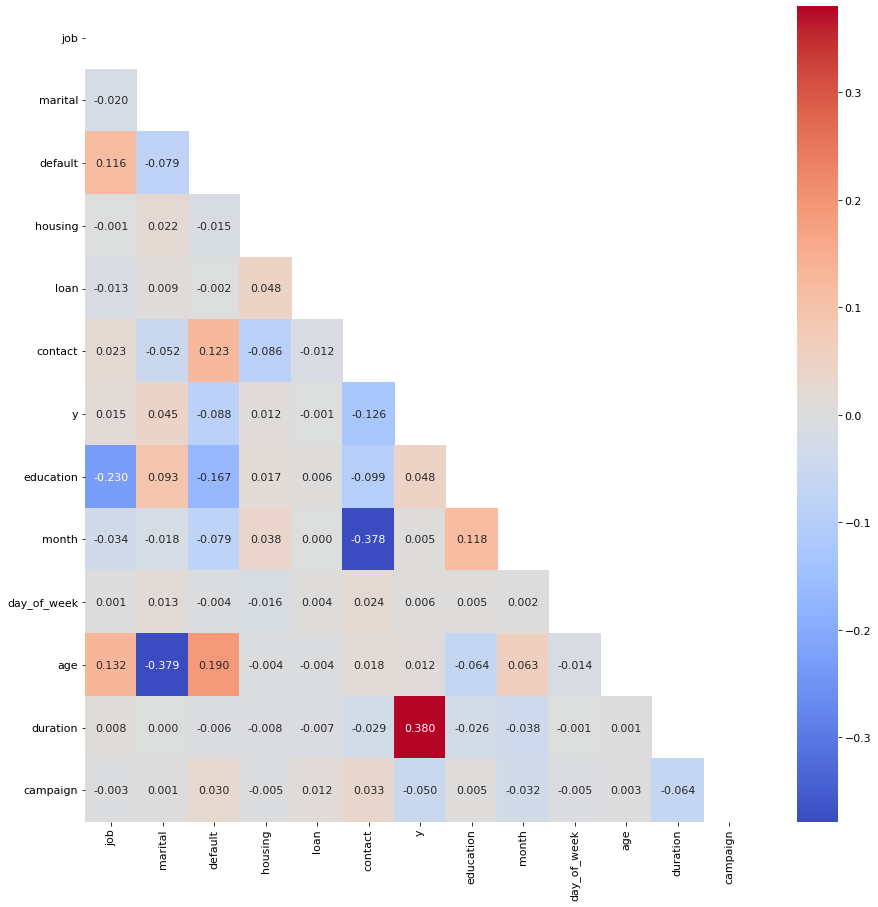

In [86]:
plt.figure(figsize=(50,50))

correlations = df2_coded.corr()
params = {'axes.titlesize':'9',
          'xtick.labelsize':'11',
          'ytick.labelsize':'11'}
matplotlib.rcParams.update(params)
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros(correlations.shape)
upper_triangle_indices = np.triu_indices_from(mask)
mask[upper_triangle_indices] = True
sns.heatmap(correlations, fmt= ".3f", annot=True, annot_kws={"size":11}, cmap= 'coolwarm', center=0, mask = mask)
plt.yticks(rotation=0)
plt.show()

Hypothesis 1: Variables Age, Job, Marital and Education are highly linked. (This is because certain age means ceratin marital, job and education status. For example, if client is 21 years old that means that either he is student, unemployed and single or maybe he is selfemployed, highschooler that is married. All combinations are possible.) - **From the correlation matrix we can see that this hypothesis is confirmed.**



# 3.5. SMOTE

In [87]:
X=df2_coded.drop(columns = 'y', axis = 1)
y=df2_coded['y']

smote=SMOTE()

X_resamp,y_resamp=smote.fit_resample(X, y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X_resamp, y_resamp, test_size=0.3, random_state=1)

In [88]:
X_train.shape

(34673, 12)

In [89]:
y_train.shape

(34673,)

In [90]:
X_test.shape

(14861, 12)

In [91]:
y_test.shape

(14861,)

Since chi-square showed that variables 'housing' and 'loan' do not impact client's decision for term deposit subscription, we are going to make models for dataset where these variables are not present.

In [92]:
#For modeling when we drop housing and loan
X2=df2_coded.drop(columns = ['y','housing', 'loan'], axis = 1)
y2=df2_coded['y']

smote=SMOTE()

X2_resamp,y2_resamp=smote.fit_resample(X2, y2.ravel())

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_resamp, y2_resamp, test_size=0.3, random_state=1)

# 4. Modeling

# 4.1. LogisticRegression

In [97]:
#We need to scale our data because variables are expressed by different measurement scales
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [98]:
#We are now going to make our model and fit it to train data
lr=LogisticRegression()

lr.fit(X_train_sc,y_train)

LogisticRegression()

In [99]:
#We are going to use cross validation as a way of making sure that our model is not overfitted!
scores = cross_val_score(lr, X_train_sc, y_train, cv = 10, scoring = 'accuracy')

In [100]:
scores.mean()

0.8360685807094009

In [102]:
#We are testing our model
y_pred=lr.predict(X_test_sc)

In [164]:
#Making the confusion matrix
#confussion_matrix = confusion_matrix(y_test, y_pred)
#print(confussion_matrix)

[[6130 1381]
 [1096 6254]]


In [104]:
#We are going to print evaluation metrics for our model
#print('Accuracy:', accuracy_score(y_test, y_pred))
#print('Precission:', precision_score(y_test, y_pred))
#print('Recall:', recall_score(y_test, y_pred))
#print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.8333221182962116
Precission: 0.8191224623444663
Recall: 0.8508843537414966
F1: 0.8347013680347014


In [105]:
#We are running our model on training data to check for overfit
y_pred_train = lr.predict(X_train_sc)

In [106]:
#confussion_matrix = confusion_matrix(y_train, y_pred_train)
#print(confussion_matrix)

[[14161  3095]
 [ 2577 14840]]


In [107]:
#print('Accuracy:', accuracy_score(y_train, y_pred_train))
#print('Precission:', precision_score(y_train, y_pred_train))
#print('Recall:', recall_score(y_train, y_pred_train))
#print('F1:', f1_score(y_train, y_pred_train))

Accuracy: 0.8364145011968968
Precission: 0.8274323947588514
Recall: 0.8520411092610668
F1: 0.8395564607377235


We can see from the metrics results that our LogisticRegression model is slightly overfitted but working great in classifying our data.

# 4.2. DecisionTree

In [108]:
#Now we are going to make a decision tree model for classification of our data
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3).fit(X_train_sc, y_train)

In [109]:
y_pred2 = dt.predict(X_test_sc)

In [110]:
#When max_depth is 3
#confussion_matrix = confusion_matrix(y_test, y_pred2)
#print(confussion_matrix)

[[4917 2594]
 [ 688 6662]]


In [111]:
#print('Accuracy:', accuracy_score(y_test, y_pred2))
#print('Precission:', precision_score(y_test, y_pred2))
#print('Recall:', recall_score(y_test, y_pred2))
#print('F1:', f1_score(y_test, y_pred2))

Accuracy: 0.7791534889980486
Precission: 0.7197493517718236
Recall: 0.9063945578231293
F1: 0.8023605925569071


Searching for the best parameters:
Because it can be hard to search for the best parameters setting we can use RandomizedSearchCV, to which we are going to forward parameters that we want to set to be the best for our data.




In [112]:
param_dist = {"max_depth" : [3, None],
              "min_samples_leaf": randint(1, 9), 
              "criterion" : ["gini", "entropy"]}

In [113]:
tree = DecisionTreeClassifier()

In [114]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 10)

In [115]:
tree_cv.fit(X_train_sc, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5ec9c68bd0>})

In [116]:
print('Tuned Decision Tree Parameters: {} '.format(tree_cv.best_params_))
print('Best score is: {}'.format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2} 
Best score is: 0.9430970671239024


In [117]:
y_predicted = tree_cv.predict(X_test_sc)

In [118]:
#confussion_matrixx = confusion_matrix(y_test, y_predicted)
#confussion_matrixx

array([[7134,  377],
       [ 480, 6870]])

In [119]:
#print('Accuracy:', accuracy_score(y_test, y_predicted))
#print('Precission:', precision_score(y_test, y_predicted))
#print('Recall:', recall_score(y_test, y_predicted))
#print('F1:', f1_score(y_test, y_predicted))

Accuracy: 0.9423322791198439
Precission: 0.9479784738512488
Recall: 0.9346938775510204
F1: 0.9412893060217853


In [120]:
y_train_predicted = tree_cv.predict(X_train_sc)

In [121]:
#confussion_matrixx = confusion_matrix(y_train, y_train_predicted)
#confussion_matrixx


array([[17194,    62],
       [  332, 17085]])

In [122]:
#print('Accuracy:', accuracy_score(y_train, y_train_predicted))
#print('Precission:', precision_score(y_train, y_train_predicted))
#print('Recall:', recall_score(y_train, y_train_predicted))
#print('F1:', f1_score(y_train, y_train_predicted))

Accuracy: 0.9886366913736914
Precission: 0.9963842071499388
Recall: 0.9809381638628926
F1: 0.9886008563823632


We can see that our model is a little bit overfitted but that may be due to our model not having the top boundary when it comes to maximum depth of our tree. So we are going to do one more parameter reseach and see if we can get our model to be less overfitted.

In [123]:
param_dist2 = {"max_depth" : [3, 13],
              "min_samples_leaf": randint(1, 9), 
              "criterion" : ["gini", "entropy"]}

In [124]:
tree2 = DecisionTreeClassifier()

In [125]:
tree2_cv = RandomizedSearchCV(tree2, param_dist2, cv = 11)

In [126]:
tree2_cv.fit(X_train_sc, y_train)

RandomizedSearchCV(cv=11, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 13],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5ec9c56fd0>})

In [127]:
print('Tuned Decision Tree Parameters: {} '.format(tree2_cv.best_params_))
print('Best score is: {}'.format(tree2_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 3} 
Best score is: 0.9347043201726559


In [128]:
y2_predicted = tree2_cv.predict(X_test_sc)

In [129]:
#confussion_matrixx = confusion_matrix(y_test, y2_predicted)
#confussion_matrixx

array([[7028,  483],
       [ 455, 6895]])

In [130]:
#print('Accuracy:', accuracy_score(y_test, y2_predicted))
#print('Precission:', precision_score(y_test, y2_predicted))
#print('Recall:', recall_score(y_test, y2_predicted))
#print('F1:', f1_score(y_test, y2_predicted))

Accuracy: 0.9368817710786622
Precission: 0.9345351043643264
Recall: 0.9380952380952381
F1: 0.9363117870722433


In [131]:
y2_train_predicted = tree2_cv.predict(X_train_sc)

In [132]:
#confussion_matrixx = confusion_matrix(y_train, y2_train_predicted)
#confussion_matrixx


array([[16565,   691],
       [  686, 16731]])

In [133]:
#print('Accuracy:', accuracy_score(y_train, y2_train_predicted))
#print('Precission:', precision_score(y_train, y2_train_predicted))
#print('Recall:', recall_score(y_train, y2_train_predicted))
#print('F1:', f1_score(y_train, y2_train_predicted))

Accuracy: 0.9602861015775964
Precission: 0.9603375043049018
Recall: 0.9606131940058563
F1: 0.9604753293722552


The better one, that is the less overfitted model is the one with maximum depth of 13. Also what is very importan to the bank is, besides the true positive and true negative subscriptions for term deposit, the number of false positive subscriptions (the clients that model has predicted to subscribe for term deposit but they did not). This is important because on these people banke has spent its money for campaign, time and human resources and they did not apply for banks product. So the bank would want to minimize the number of false positive clients.

# 4.3. KNN

In [134]:
#We are defining our knn model
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

In [135]:
#Fitting of our model on training data
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(metric='euclidean')

In [136]:
#Testing model on test data
y_pred3 = knn.predict(X_test_sc)

In [137]:
#When n_neighbors is 5
#confussion_matrix = confusion_matrix(y_test, y_pred3)
#print(confussion_matrix)

[[6569  942]
 [ 480 6870]]


In [138]:
#print('Accuracy:', accuracy_score(y_test, y_pred3))
#print('Precission:', precision_score(y_test, y_pred3))
#print('Recall:', recall_score(y_test, y_pred3))
#print('F1:', f1_score(y_test, y_pred3))

Accuracy: 0.9043133032770339
Precission: 0.879416282642089
Recall: 0.9346938775510204
F1: 0.9062129006727344


In [139]:
y3pred_train = knn.predict(X_train_sc)

In [140]:
#confussion_matrix = confusion_matrix(y_train, y3pred_train)
#print(confussion_matrix)

[[15705  1551]
 [  671 16746]]


In [141]:
#print('Accuracy:', accuracy_score(y_train, y3pred_train))
#print('Precission:', precision_score(y_train, y3pred_train))
#print('Recall:', recall_score(y_train, y3pred_train))
#print('F1:', f1_score(y_train, y3pred_train))

Accuracy: 0.9359155538891933
Precission: 0.9152320052467617
Recall: 0.9614744215421714
F1: 0.9377835022680181


Our model is slightly overfitted, so we are going to search for the optimal number of neighbors using corss validation score.

In [142]:
k_range = range(1,30)
k_score = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X_train_sc, y_train, cv = 10, scoring = 'accuracy')
  k_score.append(scores.mean())

In [143]:
k_score

[0.919274672151899,
 0.9073633540692952,
 0.9091226921552993,
 0.9058925994938603,
 0.9034123432368926,
 0.9018260987015821,
 0.8996341015919084,
 0.8992879477585498,
 0.8963752320860816,
 0.8961156167110629,
 0.8943852966626512,
 0.8943274601956359,
 0.8919626523135085,
 0.8927412156603254,
 0.8913568831051313,
 0.8916164818461361,
 0.8900879906077703,
 0.8895398665752461,
 0.8887901299748593,
 0.8884727945709239,
 0.8872616054684654,
 0.8868001779174148,
 0.8863386838303077,
 0.8861656152306358,
 0.8852427434945204,
 0.8846947442171018,
 0.8836852924376115,
 0.8836851510484918,
 0.882473912043991]

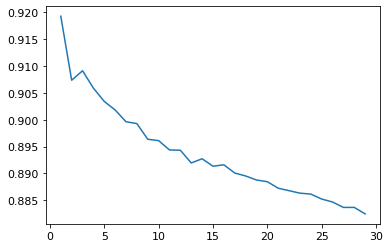

In [145]:
sns.lineplot(x = k_range, y = k_score)

In [146]:
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean')

In [147]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [148]:
y_pred4 = knn.predict(X_test_sc)

In [149]:
#When n_neighbors is 8
#confussion_matrix = confusion_matrix(y_test, y_pred4)
#print(confussion_matrix)

[[6698  813]
 [ 679 6671]]


In [150]:
#print('Accuracy:', accuracy_score(y_test, y_pred4))
#print('Precission:', precision_score(y_test, y_pred4))
#print('Recall:', recall_score(y_test, y_pred))
#print('F1:', f1_score(y_test, y_pred4))

Accuracy: 0.8996029876858892
Precission: 0.8913682522715125
Recall: 0.8508843537414966
F1: 0.899420250775246


In [151]:
y4pred_train = knn.predict(X_train_sc)

In [152]:
#confussion_matrix = confusion_matrix(y_train, y4pred_train)
#print(confussion_matrix)

[[15760  1496]
 [ 1156 16261]]


In [153]:
#print('Accuracy:', accuracy_score(y_train, y4pred_train))
#print('Precission:', precision_score(y_train, y4pred_train))
#print('Recall:', recall_score(y_train, y4pred_train))
#print('F1:', f1_score(y_train, y4pred_train))

Accuracy: 0.9235139734087042
Precission: 0.9157515346060708
Recall: 0.9336280645346501
F1: 0.9246034002388128


Our knn model is also slightly overfitted but we can see that the best results has given the number of neighbors equal to 5 since it evaluation metrics are better and we have less false negative client's subsrciptions.




## Model 2

Now we are going to do the same as before but without variables 'housing' and 'loan' and see how our algorithms work in that situation.

# 4.1. LogisticRegression

In [154]:
sc=StandardScaler()
X2_train_sc=sc.fit_transform(X_train)
X2_test_sc=sc.transform(X_test)

In [155]:
lr=LogisticRegression()

model1 = lr.fit(X2_train_sc,y2_train)

In [156]:
scores = cross_val_score(lr, X2_train_sc, y2_train, cv = 10, scoring = 'accuracy')

In [157]:
scores.mean()

0.8360685807094009

In [158]:
y2_pred=lr.predict(X2_test_sc)

In [159]:
#confussion_matrix = confusion_matrix(y2_test, y2_pred)
#print(confussion_matrix)

[[6130 1381]
 [1096 6254]]


In [160]:
#print('Accuracy:', accuracy_score(y2_test, y2_pred))
#print('Precission:', precision_score(y2_test, y2_pred))
#print('Recall:', recall_score(y2_test, y2_pred))
#print('F1:', f1_score(y2_test, y2_pred))

Accuracy: 0.8333221182962116
Precission: 0.8191224623444663
Recall: 0.8508843537414966
F1: 0.8347013680347014


In [161]:
y2_pred_train = lr.predict(X2_train_sc)

In [162]:
#confussion_matrix = confusion_matrix(y2_train, y2_pred_train)
#print(confussion_matrix)

[[14161  3095]
 [ 2577 14840]]


In [163]:
#print('Accuracy:', accuracy_score(y2_train, y2_pred_train))
#print('Precission:', precision_score(y2_train, y2_pred_train))
#print('Recall:', recall_score(y2_train, y2_pred_train))
#print('F1:', f1_score(y2_train, y2_pred_train))

Accuracy: 0.8364145011968968
Precission: 0.8274323947588514
Recall: 0.8520411092610668
F1: 0.8395564607377235


We can see from the metrics results and confusion matrix that there have not been great changes within our model, so it does not matter whether there are these two variables or not, the results will be almost identical.

# 4.2. DecisionTree

In [165]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3).fit(X2_train_sc, y2_train)

In [166]:
y2_pred2 = dt.predict(X2_test_sc)

In [167]:
#When max_depth is 3
#confussion_matrix = confusion_matrix(y2_test, y2_pred2)
#print(confussion_matrix)

[[4917 2594]
 [ 688 6662]]


In [168]:
#print('Accuracy:', accuracy_score(y2_test, y2_pred2))
#print('Precission:', precision_score(y2_test, y2_pred2))
#print('Recall:', recall_score(y2_test, y2_pred2))
#print('F1:', f1_score(y2_test, y2_pred2))

Accuracy: 0.7791534889980486
Precission: 0.7197493517718236
Recall: 0.9063945578231293
F1: 0.8023605925569071


Searching for the best parameters

In [169]:
param_dist = {"max_depth" : [3, None],
              "min_samples_leaf": randint(1, 9), 
              "criterion" : ["gini", "entropy"]}

In [170]:
tree3 = DecisionTreeClassifier()

In [172]:
tree3_cv = RandomizedSearchCV(tree3, param_dist, cv = 10)

In [173]:
tree3_cv.fit(X2_train_sc, y2_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5ec6a3d7d0>})

In [174]:
print('Tuned Decision Tree Parameters: {} '.format(tree3_cv.best_params_))
print('Best score is: {}'.format(tree3_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4} 
Best score is: 0.9419435647823324


In [175]:
y2_predicted = tree3_cv.predict(X2_test_sc)

In [176]:
#confussion_matrixx = confusion_matrix(y2_test, y2_predicted)
#confussion_matrixx

array([[7159,  352],
       [ 488, 6862]])

In [177]:
#print('Accuracy:', accuracy_score(y2_test, y2_predicted))
#print('Precission:', precision_score(y2_test, y2_predicted))
#print('Recall:', recall_score(y2_test, y2_predicted))
#print('F1:', f1_score(y2_test, y2_predicted))

Accuracy: 0.9434762129062647
Precission: 0.9512059883559745
Recall: 0.9336054421768708
F1: 0.9423235374897005


In [178]:
y2_train_predicted = tree3_cv.predict(X2_train_sc)

In [179]:
#confussion_matrixx = confusion_matrix(y2_train, y2_train_predicted)
#confussion_matrixx


array([[17012,   244],
       [  546, 16871]])

In [180]:
#print('Accuracy:', accuracy_score(y2_train, y2_train_predicted))
#print('Precission:', precision_score(y2_train, y2_train_predicted))
#print('Recall:', recall_score(y2_train, y2_train_predicted))
#print('F1:', f1_score(y2_train, y2_train_predicted))

Accuracy: 0.977215700977706
Precission: 0.9857434998539293
Recall: 0.9686513176781305
F1: 0.9771226688289123


We are going to set the above boundary for depth so there will not be danger of too deep tree. But we can see that we already have better results with this model without 'housing' and 'loan', that is because our tree has less variables and is easier to divide and set path for our data to flow toward their right classification label.

In [181]:
param_dist2 = {"max_depth" : [3, 13],
              "min_samples_leaf": randint(1, 9), 
              "criterion" : ["gini", "entropy"]}

In [182]:
tree4 = DecisionTreeClassifier()

In [183]:
tree4_cv = RandomizedSearchCV(tree4, param_dist2, cv = 11)

In [184]:
tree4_cv.fit(X2_train_sc, y2_train)

RandomizedSearchCV(cv=11, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 13],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5eca6d1c50>})

In [185]:
print('Tuned Decision Tree Parameters: {} '.format(tree4_cv.best_params_))
print('Best score is: {}'.format(tree4_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 4} 
Best score is: 0.9346176578118481


In [186]:
y4_predicted = tree4_cv.predict(X2_test_sc)

In [187]:
#confussion_matrixx = confusion_matrix(y2_test, y4_predicted)
#confussion_matrixx

array([[7064,  447],
       [ 472, 6878]])

In [188]:
#print('Accuracy:', accuracy_score(y2_test, y4_predicted))
#print('Precission:', precision_score(y2_test, y4_predicted))
#print('Recall:', recall_score(y2_test, y4_predicted))
#print('F1:', f1_score(y2_test, y4_predicted))

Accuracy: 0.9381602853105444
Precission: 0.9389761092150171
Recall: 0.9357823129251701
F1: 0.9373764906303237


In [189]:
y4_train_predicted = tree4_cv.predict(X2_train_sc)

In [190]:
#confussion_matrixx = confusion_matrix(y2_train, y4_train_predicted)
#confussion_matrixx


array([[16548,   708],
       [  753, 16664]])

In [191]:
#print('Accuracy:', accuracy_score(y2_train, y4_train_predicted))
#print('Precission:', precision_score(y2_train, y4_train_predicted))
#print('Recall:', recall_score(y2_train, y4_train_predicted))
#print('F1:', f1_score(y2_train, y4_train_predicted))

Accuracy: 0.9578634672511752
Precission: 0.9592447616854709
Recall: 0.9567663776769822
F1: 0.9580039667711058


We can see that this tree classificator is a little bit overfitted but has great classification results so far.

# 4.3. KNN

In [192]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

In [193]:
knn.fit(X2_train_sc, y2_train)

KNeighborsClassifier(metric='euclidean')

In [194]:
y_pred4 = knn.predict(X2_test_sc)

In [195]:
#When n_neighbors is 5
#confussion_matrix = confusion_matrix(y2_test, y_pred4)
#print(confussion_matrix)

[[6569  942]
 [ 480 6870]]


In [196]:
#print('Accuracy:', accuracy_score(y2_test, y_pred4))
#print('Precission:', precision_score(y2_test, y_pred4))
#print('Recall:', recall_score(y2_test, y_pred4))
#print('F1:', f1_score(y2_test, y_pred4))

Accuracy: 0.9043133032770339
Precission: 0.879416282642089
Recall: 0.9346938775510204
F1: 0.9062129006727344


In [197]:
y4pred_train = knn.predict(X2_train_sc)

In [198]:
#confussion_matrix = confusion_matrix(y2_train, y4pred_train)
#print(confussion_matrix)

[[15705  1551]
 [  671 16746]]


In [199]:
#print('Accuracy:', accuracy_score(y2_train, y4pred_train))
#print('Precission:', precision_score(y2_train, y4pred_train))
#print('Recall:', recall_score(y2_train, y4pred_train))
#print('F1:', f1_score(y2_train, y4pred_train))

Accuracy: 0.9359155538891933
Precission: 0.9152320052467617
Recall: 0.9614744215421714
F1: 0.9377835022680181


In [200]:
k_range = range(1,30)
k_score = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X2_train_sc, y2_train, cv = 10, scoring = 'accuracy')
  k_score.append(scores.mean())

In [201]:
k_score

[0.919274672151899,
 0.9073633540692952,
 0.9091226921552993,
 0.9058925994938603,
 0.9034123432368926,
 0.9018260987015821,
 0.8996341015919084,
 0.8992879477585498,
 0.8963752320860816,
 0.8961156167110629,
 0.8943852966626512,
 0.8943274601956359,
 0.8919626523135085,
 0.8927412156603254,
 0.8913568831051313,
 0.8916164818461361,
 0.8900879906077703,
 0.8895398665752461,
 0.8887901299748593,
 0.8884727945709239,
 0.8872616054684654,
 0.8868001779174148,
 0.8863386838303077,
 0.8861656152306358,
 0.8852427434945204,
 0.8846947442171018,
 0.8836852924376115,
 0.8836851510484918,
 0.882473912043991]

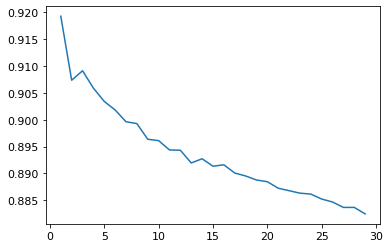

In [202]:
sns.lineplot(x = k_range, y = k_score)

In [203]:
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean')

In [204]:
knn.fit(X2_train_sc, y2_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [205]:
y_pred5 = knn.predict(X2_test_sc)

In [206]:
#When n_neighbors is 8
#confussion_matrix = confusion_matrix(y2_test, y_pred5)
#print(confussion_matrix)

[[6698  813]
 [ 679 6671]]


In [207]:
#print('Accuracy:', accuracy_score(y2_test, y_pred5))
#print('Precission:', precision_score(y2_test, y_pred5))
#print('Recall:', recall_score(y2_test, y_pred5))
#print('F1:', f1_score(y2_test, y_pred5))

Accuracy: 0.8996029876858892
Precission: 0.8913682522715125
Recall: 0.9076190476190477
F1: 0.899420250775246


In [208]:
y5pred_train = knn.predict(X2_train_sc)

In [209]:
#confussion_matrix = confusion_matrix(y2_train, y5pred_train)
#print(confussion_matrix)

[[15760  1496]
 [ 1156 16261]]


In [210]:
#print('Accuracy:', accuracy_score(y2_train, y5pred_train))
#print('Precission:', precision_score(y2_train, y5pred_train))
#print('Recall:', recall_score(y2_train, y5pred_train))
#print('F1:', f1_score(y2_train, y5pred_train))

Accuracy: 0.9235139734087042
Precission: 0.9157515346060708
Recall: 0.9336280645346501
F1: 0.9246034002388128


And to say once more, when it comes to knn the best number of neighbors is 5.

# **5.Evaluation**

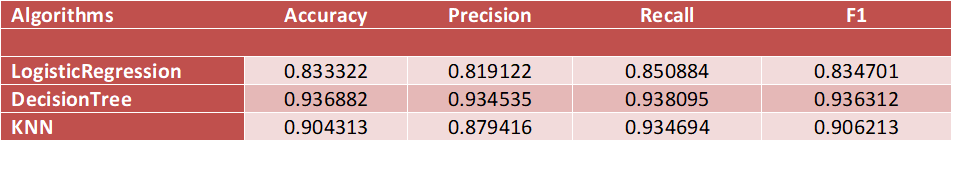

From evaluation metrics we can see that the best model is DecisionTree while the worst is LogisticRegression. Also DecisionTree has the lowest value of false positive clients (clients that the model labeled as the ones to have subscribed for term deposit when in reality they have not). The false positive number is more important to us than false negative from the following reason: on false positive clients the bank has spent resources (time, money and human resources), which could be used for some other purposes, while false negative clients are darkhorse (model labeled them as the ones to have not subscribed for term deposit when in reality they have). So we need to minimize the false positive classification and to see if our model does that we use precision and we can see that the precision is high so the model classifies clients very well.

# **6.Conclusion**


*   First of all, the best model for our classification of clients is Decision Tree, with maximum depth of 13. This model classifies 93,6882% of clients correctly, and has a great recall score of 93,8095% (clients that have really subscribed for term deposit out of sum of clients who have really subscribed for term deposit and those who model has predicted as clients that have not subscribed but in reality have). **This model also has the lowest nubmer of false positive clients (that is clients marked as those to subscribe for term deposit but the have not done so in reality), which is the label that bank wants to minimize.**

*   Secondly, what is interesting is that in the case of variable ***'PREVIOUS'*** we have more clients who have subscribed for term deposit after the previous campaign which was success for them, so they can be labeled as **loyal clients**. Also bank could conduct a survey and investigate the clients that we labeled as loyal: why did they subscribe again, whit which services were they satisfied, what are their suggestions for changes, etc. So that we can see which are the things the bank did right and which one it should change.
*   When we look in variable ***'JOB'*** by success of subscription we can see that clients that are retiered were the ones that have subscribed for term deposit in greater number of cases than those that have job like entrepreneurs, managers, housemaids, service people, self-employed and students. This is somewhat logical because they in some way tend to save more because of their lower monthly income than those that are employed.

*   For the variable ***'MONTH'***, May and August were the most successful for subscription. Also we can see that the number of those who have and have not subscribed for term deposit is balanced in autumn and winter months (September, October, December and March) with exception of November. The bank could step up its promotional campaign during the winter and autumn months to increase the number of customers using its product.
*   For the variable ***'CONTACT'***, more successful were cellular ways of contacting clients which is understandable because almost everyone has mobile phone. In this case the bank can do a C/B analysis and see if there is really need for operators who call clients on their home telephone, these resources could be allocated on some other distribution channels (like ebanking application, online promotion, etc.) because we live in the century of telecomunication anf internet technologies which are closer to the younger generations.

*   And last but not least, here are some interesting insights about ***'AGE' ***structure of the bank's clients that may help in future campaign:

1.   As for clients from 17 to 25 years, the majority of them is in group that has no salary (they are either students or unemployed) and we have some of them that work some high or low paid jobs (depending on the rank of education), they are single and mainly have either secondary or primary education. They are to be the less popular group of clients because of unstable or no salary, also their salary tends to be very low, and they were less interested in subscription for term deposit. For this type of clients bank can make some 'student package' or 'late teens package' in which clients would not pay account maintenance and could use the deposit as a kind of student loan if they needed it, so that they can withdraw that money before due date and without penalty fees.

2.  Clients from 25 to 35 years are employed in some of high-paid jobs (in administration, management or services), those up to 30 years are mainly single and those from 30 years are mainly married. The majority of them has tertiary education (university degree or some professional course). This could be bank's potential target group - this group was more interested in subscription for term deposit (administrators, for example, were the most dominant group for subscription), and also they have higher salaries since they have high-paid jobs (so they have more funds to invest) and higher education (so they are more informed about the positive sides of investing in banks).

3.  Those from 35 to around 55 years are mainly clients that have low-paid jobs (bluecollar, technician, housemaid), thay have either secondary or primary education, and are mainly married but there is also a great number of those who are divorced. They were less enthusiastic to subscribe for term deposit which is probably due to unstable and low-paid jobs, marriage problems (since great amount of them is divorced), so the bank can provide some more favorable services to attract this type of clients (for example, a series of account fees, a possibility to draw their money before the due date without penalty fees, etc.)

4.   Group of clients that is 60 years old and more are mainly people who have primary education (which probably means that the have worked some low-paid jobs)and have no salary (that is they are retired). These are people that love to save money for 'bad days', and they tend to be loyal to the bank and use its products constantly, so for them bank can make some type of loyalty program in which these clients can get some affordable services (for example, they can withdraw their money when needed, they can transfer term deposit funds to their inheritors in case of death so they can continue to use service in their name or withdraw that money and use for some other purposes, etc.).

# Information that could lead to improvement of clients classification: 

1.   we do not know the rate for term deposit, that is we do not know the price the bank will have to pay to its clients for taking and using their money; 
2.   we do not know the time for which the clients are willing to give up their funds for current spending, which is important because in this way the clients loose their liquidity;
3.   in our dataset we lack the data about clients that are labeled as subscibers for term deposit; this is a big problem since we had to use SMOTE method for oversampling our minor class and that copying of data can couse for our models to be imprecise . So the bank needs to check if there is more information about this type of clients;
4.   we lack the data about clients cash flow, that is their balace on current account; this is important because we can distinct clients as depositors and non depositors by looking at their balance on their current account and history of spending (those that spend less are more likely to put their money in good use by depositing money in the bank, and vice versa);
5.   we lack the data about clients possession of credit cards; it could be interesting to see if there is some type of conection between the possession of credit card and subscription for term deposit;
6.   we need some data about usage of mobile aplication because if clients use mobile aplication of the bank than bank can present its products through this channel of distribution (which is very popular among younger people) and it doe not represent a cost for them;
7.   we need some data that represents the stability and confidence in the banking sector (like ROA,ROE,ROI,liquidity ratio, solvency ratio, regulatory capital rate,etc.) so that we can see what is the current climate in the whole country's banking sector. This is important because high uncertainty and instability can be the cause of low term deposit subscription (clients are scared to deposit their money from the fear of the bank 'eating' their money, like it was the case in Serbia during 90s when the pyramid bank 'Dafina' collapsed and clients lost millions of marks).



# **Confirmation or Rejection of initial hypothesis**

Hypothesis 1: Variables Age, Job, Marital and Education are highly linked. (This is because certain age means ceratin marital, job and education status. For example, if client is 21 years old that means that either he is student, unemployed and single or maybe he is selfemployed, highschooler that is married. All combinations are possible.) - **From the correlation matrix we can see that this hypothesis is confirmed.**

*Hypothesis 2:* Clients that have between 18 and 25 years and those above 65 are less likely to subscribe a term deposit. (That is because those between 18 and 25 years maybe are students or employed people with no long-term stable job so their salary variates. When we talk about those above 65, they are mostly retired and their pension is smaller than salary of employed people so they are less likely to subscribe for term deposit.) - **The first half of hypothesis is confirmed while the other half has to be rejected due to data proving to us that retiered people save more money.**

*Hypothesis 3:* Clients with better paid jobs are more likely to subscribe for a term deposit. (This is because those clients have more money to invest than those with lower paid jobs, for example, people in administration, entrepreneur and management have bigger salaries than those employed as blue-collars, housemaids and students who work part-time.) - **This hypothesis is confirmed.**

*Hypothesis 4*: Clients that are single are more likely to subscribe for a term deposit. (This is because they have salary for themselves to use freely as they find it fit, instead of those who have family, kids and so on to take care of.) - **This hypothesis has to be rejected since the data confirms that clients who are married tend to subscribe for term deposit more than clients who are single.**

*Hypothesis 5*: Clients with high education level are more likely to subscribe for a term deposit. (This is because we can assume that those with high educatiom have more money and are more familiar with pros of term deposits than those with low education and low salaries.) - **This hypothesis is confirmed.**

*Hypothesis 6*: Clients with some kind of loan are less likely to subscribe a for term deposit. (This is because their free funds are reserved for loan repayment.) - **We have to reject this hypothesis since data proved that clients with housing loan were the ones that subscribed for term deposit instead of those that do not have this type of loan.**

*Hypothesis 7:* Clients contacted in March, April, May, September, October and November and on Tuesdays, Wednesdays and Thursdays are more likely to subscribe for a term deposit. (This is because on these months people rarely go on vacation or are spending money on presents. As it goes for days we can say that Monday is the least favorite day of week and on Fridays everyone cannot wait to go home and prepare for weekend so they are less likely to listen to any propositions.) - **We can reject the part of hypothesis which refers to days of week on which are clients more likely to subscribe for a term deposit, because, from our data, we cannot say some days are in favour over other ones. As it goes for months May is the most favorable one from subscription's point of view however other mentioned months are equal in number of clients who have and have not subscribed.**

*Hypothesis 8:* Variables Campaign, Pdays, Previous and Poutcome are not relevant for prediction whether or not client will subscribe for a term deposit. (We can say that maybe these variables cannot be important for our campaign outcome because the current results may differ from the previous ones.) - **We can say that this hypothesis is confirmed sice variables Pdays and Poutcome were excluded after dropping out outliers (there were left only clients in one category for these variables), variable Campaign has coefficient of correlation that almost equals zero with dependent variable so we can say that this variable is not relevant to us in classification. As it goes for variable Previous we have seen from the data that there are some clients that have subscribed for previous and for current campaign and there is linkage but due to dropping out outliers this variable was excluded like Pdays and Poutcome.**